In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!kaggle datasets download -d bryanchungweather/nba-player-stats-dataset-for-the-2023-2024

Dataset URL: https://www.kaggle.com/datasets/bryanchungweather/nba-player-stats-dataset-for-the-2023-2024
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/260k [00:00<?, ?B/s]
100% 260k/260k [00:00<00:00, 84.3MB/s]


In [ ]:
!unzip nba-player-stats-dataset-for-the-2023-2024.zip

Archive:  nba-player-stats-dataset-for-the-2023-2024.zip
  inflating: NBA_2024_per_game(03-01-2024).csv  
  inflating: NBA_2024_per_game(04-12-2023).csv  
  inflating: NBA_2024_per_game(05-12-2023).csv  
  inflating: NBA_2024_per_game(13-11-2023 Updated).csv  
  inflating: NBA_2024_per_game(15-11-2023 Updated).csv  
  inflating: NBA_2024_per_game(17-11-2023).csv  
  inflating: NBA_2024_per_game(20-11-2023).csv  
  inflating: NBA_2024_per_game(22-11-2023).csv  
  inflating: NBA_2024_per_game(26-01-2024).csv  
  inflating: NBA_2024_per_game(27-12-2023).csv  
  inflating: NBA_2024_per_game(28-11-2023).csv  


# Data Manipulation


### Load and combine the data:

In [ ]:
import pandas as pd
import os

# List all CSV files in the current directory
csv_files = [file for file in os.listdir() if file.endswith('.csv') and 'NBA_2024_per_game' in file]

# Read and combine all CSV files
df_list = [pd.read_csv(file) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)
print(f"Original dataset shape: {df.shape}")

# Check the total number of rows before removing duplicates
print(f"Total rows before removing duplicates: {len(df)}")

# Check the number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicate rows based on all columns
df = df.drop_duplicates()

# Check the total number of rows after removing duplicates
print(f"Total rows after removing duplicates: {len(df)}")

print(f"Combined dataset shape: {df.shape}")

Original dataset shape: (5522, 29)
Total rows before removing duplicates: 5522
Number of duplicate rows: 1612
Total rows after removing duplicates: 3910
Combined dataset shape: (3910, 29)


The presence of duplicates could be due to:
1. Multiple updates of the same games in different CSV files
2. Players appearing multiple times if they changed teams during the season

### Handling missing values

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with appropriate methods
df['FG%'] = df['FG%'].fillna(df['FG%'].mean())
df['3P%'] = df['3P%'].fillna(df['3P%'].mean())
df['2P%'] = df['2P%'].fillna(df['2P%'].mean())
df['eFG%'] = df['eFG%'].fillna(df['eFG%'].mean())
df['FT%'] = df['FT%'].fillna(df['FT%'].mean())

# Drop rows with missing values in other columns
df.dropna(inplace=True)

# After the dropna() operation
print("Columns and their data types after data cleaning:")
print(df.dtypes)

print("\nNumber of rows and columns:")
print(df.shape)

print("\nFirst few rows of the cleaned dataset:")
print(df.head())

print("\nSummary statistics of numerical columns:")
print(df.describe())

# Check for missing values again
print(df.isnull().sum())

Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64
Columns and their data types after data cleaning:
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

Number of rows and columns:
(3910, 29)

First few ro

### Convert data types:

In [ ]:
# Convert percentage columns to float
percentage_cols = ['FG%', '3P%', '2P%', 'eFG%', 'FT%']
for col in percentage_cols:
    df[col] = df[col].astype(str).str.rstrip('%').astype('float') / 100.0

# Convert 'Age' to integer type
df['Age'] = df['Age'].astype(int)

### Create new features:.


In [ ]:
# Create a new feature 'PointsPerMinute'
df['PointsPerMinute'] = df['PTS'] / df['MP']

# Create a new feature 'TotalRebounds'
df['TotalRebounds'] = df['ORB'] + df['DRB']

# Create a new feature 'ShootingEfficiency'
df['ShootingEfficiency'] = (df['FG%'] + df['3P%'] + df['FT%']) / 3

### Filter and categorize data:

1. It creates an explicit copy of the filtered DataFrame using .copy(). This ensures that df_filtered is a new DataFrame and not a view of the original df.
2. It uses the .loc accessor to assign the new 'ScoringCategory' column. This is the recommended way to add or modify columns in pandas to avoid warnings and ensure that the operation works as intended.

In [ ]:
# Filter players who played more than 10 games
df_filtered = df[df['G'] > 10].copy()  # Create an explicit copy

# Categorize players based on their scoring average
def scoring_category(pts):
    if pts < 10:
        return 'Low Scorer'
    elif pts < 20:
        return 'Average Scorer'
    else:
        return 'High Scorer'

# Use .loc to assign the new column
df_filtered.loc[:, 'ScoringCategory'] = df_filtered['PTS'].apply(scoring_category)

In [ ]:
print(df_filtered.dtypes)
print(df_filtered.shape)
print(df_filtered.head())
print(df_filtered.describe())

Player                 object
Pos                    object
Age                     int64
Tm                     object
G                       int64
GS                      int64
MP                    float64
FG                    float64
FGA                   float64
FG%                   float64
3P                    float64
3PA                   float64
3P%                   float64
2P                    float64
2PA                   float64
2P%                   float64
eFG%                  float64
FT                    float64
FTA                   float64
FT%                   float64
ORB                   float64
DRB                   float64
TRB                   float64
AST                   float64
STL                   float64
BLK                   float64
TOV                   float64
PF                    float64
PTS                   float64
PointsPerMinute       float64
TotalRebounds         float64
ShootingEfficiency    float64
ScoringCategory        object
dtype: obj

### Handle outliers:

Purpose:
* Outliers can significantly skew statistical analyses and machine learning models.
* Removing them can lead to more robust and accurate results.

Method Explanation:
* The IQR is the range between the first quartile (25th percentile) and third quartile (75th percentile).
* Values below Q1 - 1.5IQR or above Q3 + 1.5IQR are considered outliers.
* This method is less sensitive to extreme values compared to using standard deviations.

In [ ]:
import numpy as np

# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from key statistics
for col in ['PTS', 'TRB', 'AST', 'STL', 'BLK']:
    df_filtered = remove_outliers(df_filtered, col)

print(f"Dataset shape after outlier removal: {df_filtered.shape}")

Dataset shape after outlier removal: (1989, 33)


### Normalize numerical features:

The purpose of this normalization is to:
* Bring all features to a similar scale, which is important for many machine learning algorithms.
* Ensure that features with larger values don't dominate the learning process.
* Improve the convergence of gradient descent algorithms.

StandardScaler specifically:
* Calculates the mean and standard deviation of each feature.
* Subtracts the mean from each data point (centering the data).
* Divides by the standard deviation (scaling to unit variance).


After this step, each normalized feature will have a mean of 0 and a standard deviation of 1. This is particularly useful for algorithms that assume the data is normally distributed or for comparing features that originally had different scales.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for normalization
numerical_cols = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform
df_normalized = df_filtered.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df_filtered[numerical_cols])

print("Data normalized using StandardScaler")
print(df_normalized.shape)

Data normalized using StandardScaler
(1989, 33)


### Save the processed dataset:

In [ ]:
# Save the processed dataset to a new CSV file
df_filtered.to_csv('nba_2024_processed.csv', index=False)
print("Processed dataset saved to 'nba_2024_processed.csv'")

Processed dataset saved to 'nba_2024_processed.csv'


# EDA


This comprehensive analysis provides several key points for your presentation:

1. Team Distribution: Visualize how players are distributed across teams, highlighting any imbalances.

2. Age vs Performance: Explore the relationship between a player's age and their scoring output, identifying peak performance age ranges.
3. Position Analysis: Compare average statistics across different positions, showcasing the unique contributions of each role.
4. Efficiency Analysis: Examine the relationship between scoring efficiency (True Shooting Percentage) and points scored.
5. Correlation Analysis: Highlight relationships between key statistics, potentially revealing interesting patterns or trade-offs in player performance.
6. Top Performers: Identify standout players in various statistical categories, providing concrete examples of exceptional performance.
7. Playing Time vs Production: Visualize the relationship between minutes played and points scored, including a trend line to show the general pattern.
8. Statistical Tests: Perform correlation and ANOVA tests to statistically validate observations about the relationships between variables.

These analyses will help us understand:
How the dataset is spread across teams, positions, and age groups
Key relationships between different performance metrics
Standout players and performances
General trends and patterns in NBA player statistics

During your presentation, we can use these insights to discuss:
The distribution of talent across the league
How age and position affect player performance
The relationship between playing time and production
Efficiency metrics and their importance
Statistical evidence for observed trends in the data

### Check column names

In [ ]:
print(df_filtered.columns)

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'PointsPerMinute', 'TotalRebounds', 'ShootingEfficiency',
       'ScoringCategory'],
      dtype='object')


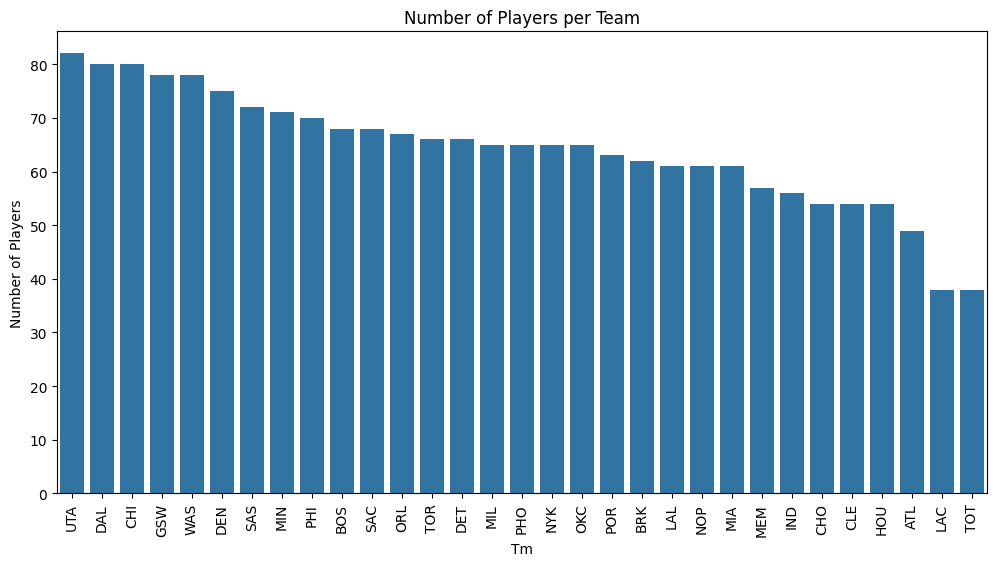

Total number of players: 1989
Number of teams: 31


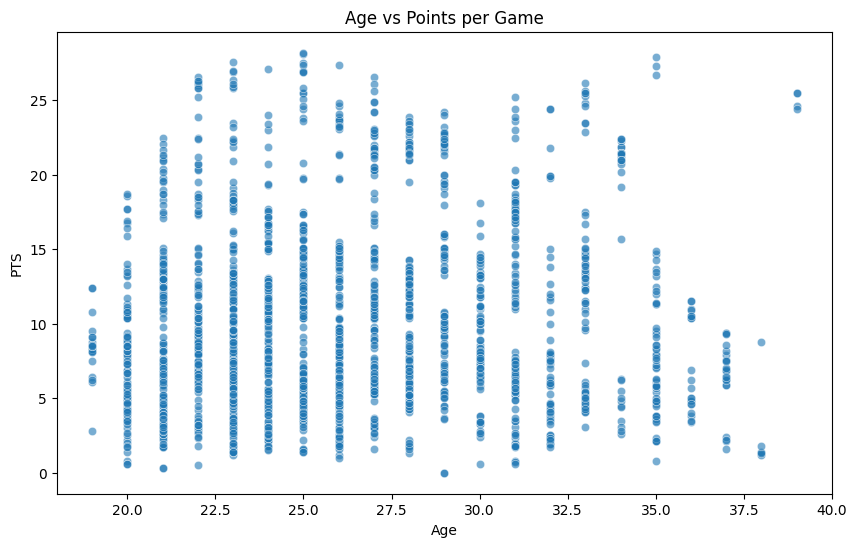

<ipython-input-40-5090b79f4278>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_points = df_filtered.groupby(age_groups)['PTS'].mean().round(2)


Average points per game by age group:
Age
<22       9.33
22-25     9.62
26-30    11.01
31-35    10.56
>35       7.63
Name: PTS, dtype: float64

Average stats by position:
         PTS   TRB   AST
Pos                     
C       7.23  5.04  1.46
C-PF    7.00  5.25  1.50
PF     10.97  4.56  1.90
PF-SF   7.10  2.90  1.30
PG     10.08  2.87  3.78
PG-SG   6.10  1.60  3.30
SF      9.91  3.58  1.83
SF-PF   4.64  3.26  0.88
SG     10.74  2.94  2.34
SG-PG  16.27  3.58  3.85


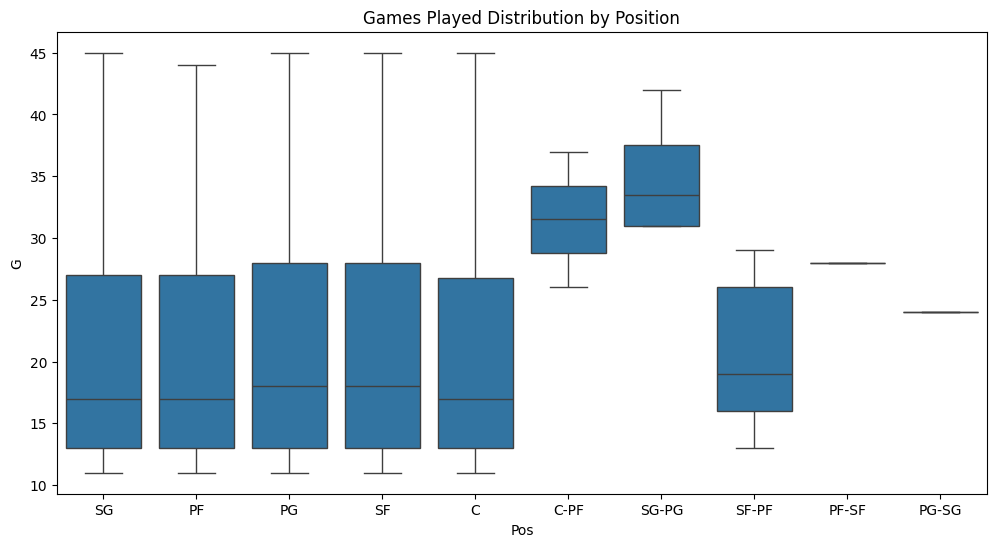

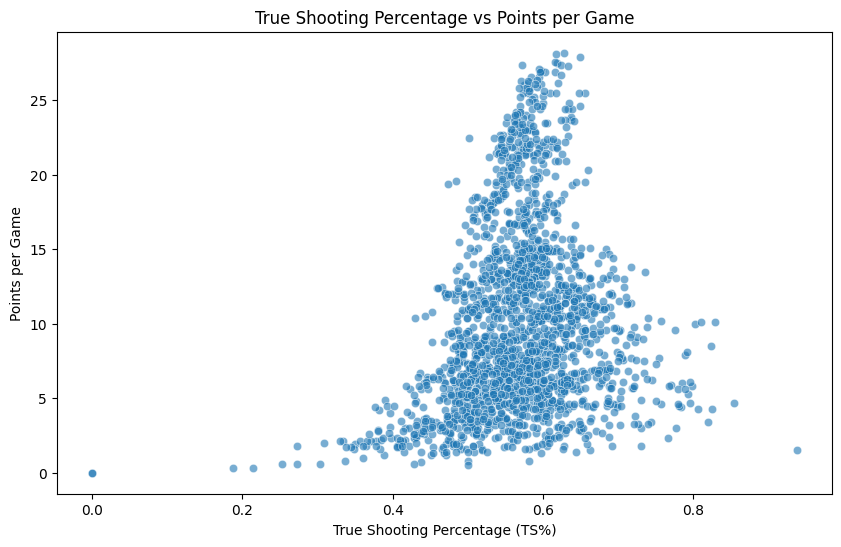

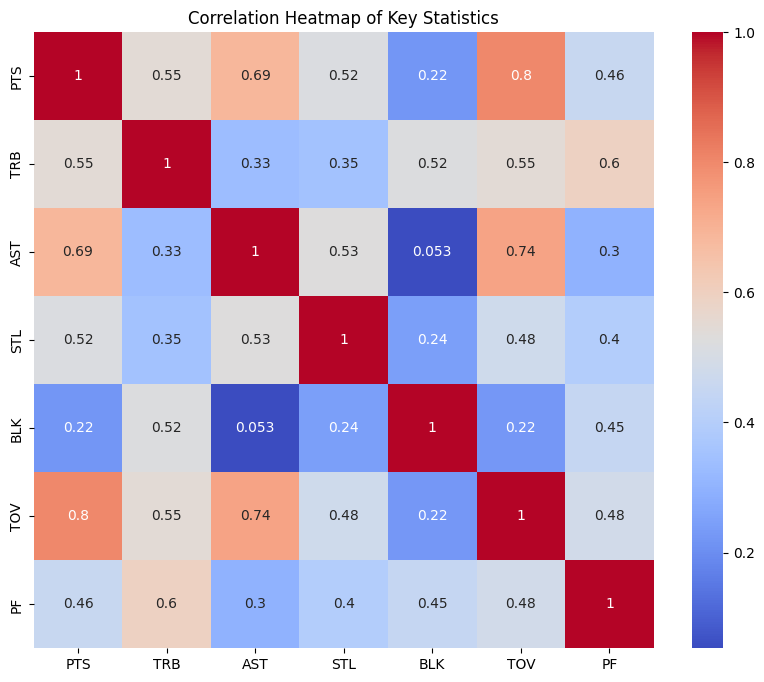


Top 5 players in PTS:
             Player   Tm   PTS
4910   Jayson Tatum  BOS  28.2
4422   Jayson Tatum  BOS  28.1
1641  Stephen Curry  GSW  27.9
751    Tyrese Maxey  PHI  27.6
409    Jayson Tatum  BOS  27.5

Top 5 players in TRB:
                 Player   Tm  TRB
252        Kevon Looney  GSW  9.7
350       Julius Randle  NYK  9.7
1517      Mark Williams  CHO  9.7
1480  Jonas Valančiūnas  NOP  9.6
4363      Julius Randle  NYK  9.6

Top 5 players in AST:
               Player   Tm  AST
805        Chris Paul  GSW  7.0
1802   Damian Lillard  MIL  7.0
3392  Dennis Schröder  TOR  7.0
5411  Dennis Schröder  TOR  7.0
2617  Cade Cunningham  DET  6.9

Top 5 players in STL:
                 Player   Tm  STL
45    Bogdan Bogdanović  ATL  1.6
207        LeBron James  LAL  1.6
805          Chris Paul  GSW  1.6
833         Cam Reddish  LAL  1.6
1117       De'Aaron Fox  SAC  1.6

Top 5 players in BLK:
              Player   Tm  BLK
357    Nick Richards  CHO  1.2
1201  Isaiah Jackson  IND  1.2
1393  

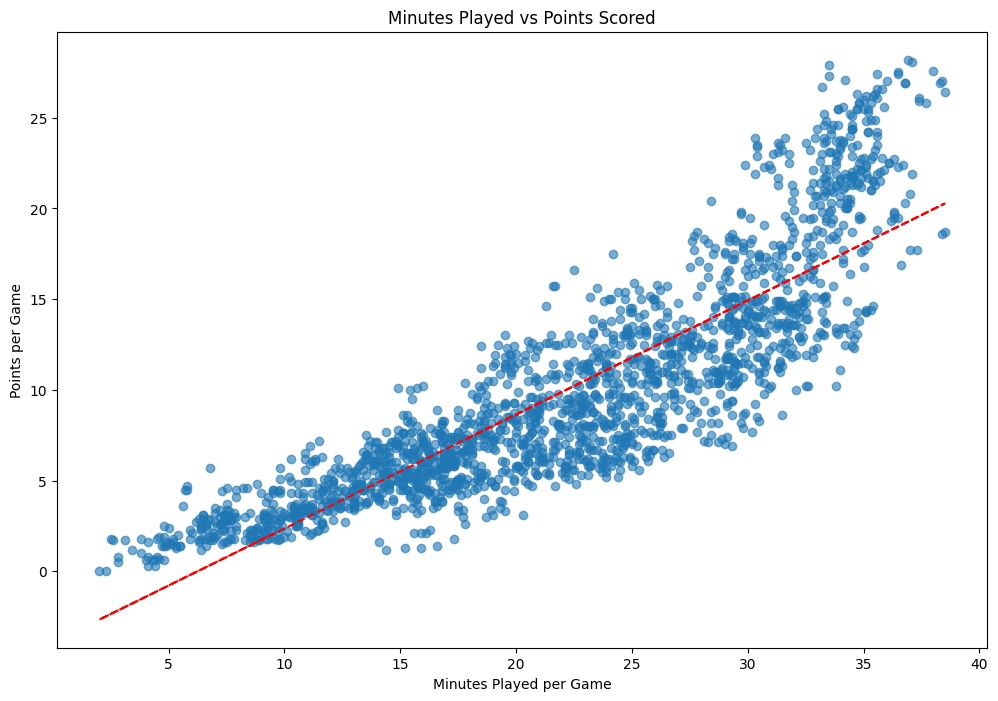


Correlation between Minutes Played and Points:
Pearson correlation: 0.87, p-value: 0.000

ANOVA test for Points across Positions:
F-value: 9.49, p-value: 0.000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Assuming df_filtered is your preprocessed DataFrame

# 1. Player Distribution Analysis
plt.figure(figsize=(12, 6))
team_counts = df_filtered['Tm'].value_counts()
sns.barplot(x=team_counts.index, y=team_counts.values)
plt.title('Number of Players per Team')
plt.xticks(rotation=90)
plt.ylabel('Number of Players')
plt.show()

print(f"Total number of players: {len(df_filtered)}")
print(f"Number of teams: {df_filtered['Tm'].nunique()}")

# 2. Age vs Performance Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='PTS', data=df_filtered, alpha=0.6)
plt.title('Age vs Points per Game')
plt.show()

age_groups = pd.cut(df_filtered['Age'], bins=[0, 22, 26, 30, 35, 100], labels=['<22', '22-25', '26-30', '31-35', '>35'])
avg_points = df_filtered.groupby(age_groups)['PTS'].mean().round(2)
print("Average points per game by age group:")
print(avg_points)

# 3. Position Analysis
pos_stats = df_filtered.groupby('Pos')[['PTS', 'TRB', 'AST']].mean().round(2)
print("\nAverage stats by position:")
print(pos_stats)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Pos', y='G', data=df_filtered)
plt.title('Games Played Distribution by Position')
plt.show()

# 4. Efficiency Analysis
df_filtered['TS%'] = df_filtered['PTS'] / (2 * (df_filtered['FGA'] + 0.44 * df_filtered['FTA'])) # True Shooting Percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TS%', y='PTS', data=df_filtered, alpha=0.6)
plt.title('True Shooting Percentage vs Points per Game')
plt.xlabel('True Shooting Percentage (TS%)')
plt.ylabel('Points per Game')
plt.show()

# 5. Correlation Analysis
corr_matrix = df_filtered[['PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Key Statistics')
plt.show()

# 6. Top Performers in Different Categories
categories = ['PTS', 'TRB', 'AST', 'STL', 'BLK']
for category in categories:
    top_5 = df_filtered.nlargest(5, category)[['Player', 'Tm', category]]
    print(f"\nTop 5 players in {category}:")
    print(top_5)

# 7. Playing Time vs Production
plt.figure(figsize=(12, 8))
plt.scatter(df_filtered['MP'], df_filtered['PTS'], alpha=0.6)
plt.xlabel('Minutes Played per Game')
plt.ylabel('Points per Game')
plt.title('Minutes Played vs Points Scored')
z = np.polyfit(df_filtered['MP'], df_filtered['PTS'], 1)
p = np.poly1d(z)
plt.plot(df_filtered['MP'], p(df_filtered['MP']), "r--")
plt.show()

# 8. Statistical Tests
print("\nCorrelation between Minutes Played and Points:")
correlation, p_value_corr = stats.pearsonr(df_filtered['MP'], df_filtered['PTS'])
print(f"Pearson correlation: {correlation:.2f}, p-value: {p_value_corr:.3f}")

print("\nANOVA test for Points across Positions:")
positions = df_filtered['Pos'].unique()
point_groups = [df_filtered[df_filtered['Pos'] == pos]['PTS'] for pos in positions]
f_value, p_value_anova = stats.f_oneway(*point_groups)
print(f"F-value: {f_value:.2f}, p-value: {p_value_anova:.3f}")

# Goal

##### Develop a deep learning model to predict NBA player performance, specifically Points Per Game (PPG).

##### Using both an LSTM (Long Short-Term Memory) model and an MLP (Multi-Layer Perceptron) model for comparison.

### Data Preparation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select features and target
features = ['MP', 'FG%', '3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK']
target = 'PTS'

X = df_filtered[features].values
y = df_filtered[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Reshape input for LSTM (samples, time steps, features)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# LSTM Model Definition
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        LSTM(32),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# Create and train the LSTM model
lstm_model = create_lstm_model((1, X_train.shape[1]))
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32,
                              validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate LSTM model
lstm_mae = lstm_model.evaluate(X_test_lstm, y_test)[1]
print(f"LSTM MAE: {lstm_mae:.2f}")

# Generate predictions
lstm_predictions = lstm_model.predict(X_test_lstm).flatten()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 141.7972 - mae: 10.2269 - val_loss: 130.0168 - val_mae: 9.6651
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 127.6454 - mae: 9.6083 - val_loss: 72.6075 - val_mae: 7.3287
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 56.0364 - mae: 6.3237 - val_loss: 21.7537 - val_mae: 3.9786
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 22.6470 - mae: 4.0652 - val_loss: 14.1329 - val_mae: 3.0726
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.5987 - mae: 3.0935 - val_loss: 9.8827 - val_mae: 2.4625
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.2916 - mae: 2.4787 - val_loss: 8.3633 - val_mae: 2.2390
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.6958 - mae: 2.2988 - val_loss: 7.5783 - val_mae: 2.1059
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.7856 - mae: 2.1668 - val_loss: 7.1266 - val_mae: 2.0230
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/

# MLP Model

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

# MLP Model Definition
def create_mlp_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# Create and train the MLP model
mlp_model = create_mlp_model(X_train.shape[1])
mlp_history = mlp_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
                            validation_split=0.2, verbose=1)

# Evaluate MLP model
mlp_mae = mlp_model.evaluate(X_test_scaled, y_test)[1]
print(f"MLP MAE: {mlp_mae:.2f}")

# Generate predictions
mlp_predictions = mlp_model.predict(X_test_scaled).flatten()

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 143.7325 - mae: 10.1687 - val_loss: 105.3790 - val_mae: 8.3648
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 86.0569 - mae: 7.4417 - val_loss: 26.9705 - val_mae: 4.0810
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.1082 - mae: 3.8385 - val_loss: 13.4973 - val_mae: 2.8710
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.9400 - mae: 3.1185 - val_loss: 11.3264 - val_mae: 2.6213
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.7659 - mae: 3.1398 - val_loss: 9.8262 - val_mae: 2.4482
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.3833 - mae: 2.7139 - val_loss: 9.0453 - val_mae: 2.3611
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.9912 - mae: 2.7259 - val_loss: 8.3354 - val_mae: 2.2667
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.5825 - mae: 2.7050 - val_loss: 7.7319 - val_mae: 2.1833
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/s

# Visualization and Comparison

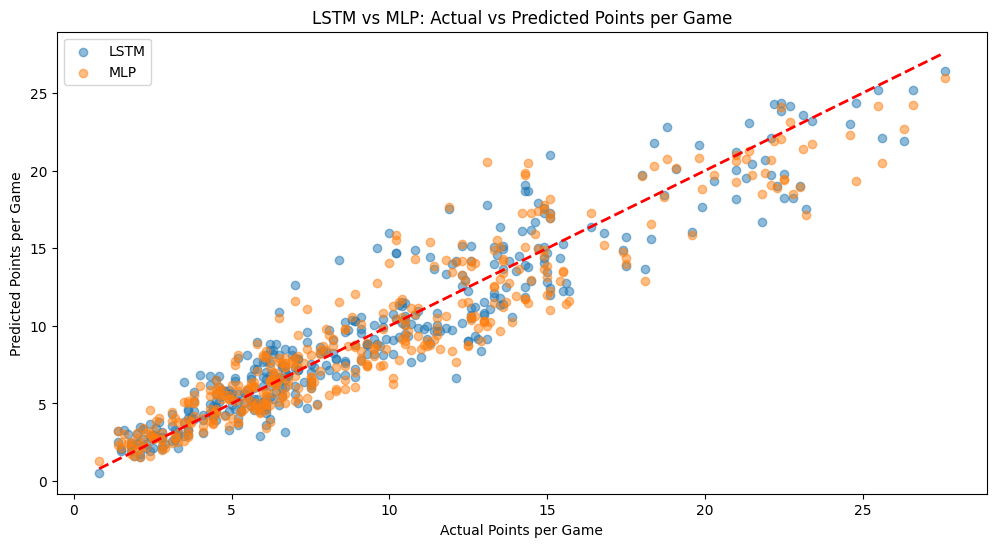

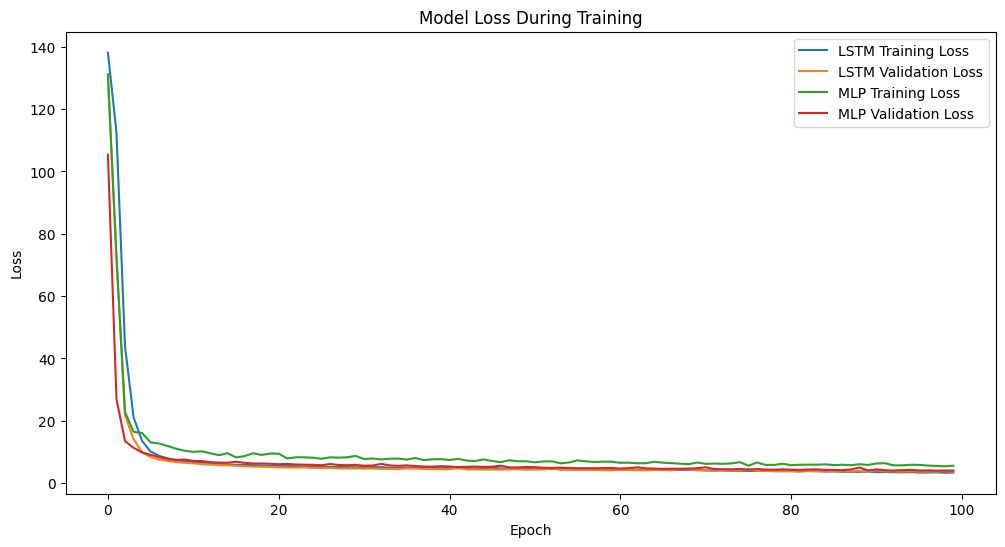

In [ ]:
# Visualize predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_test, lstm_predictions, label='LSTM', alpha=0.5)
plt.scatter(y_test, mlp_predictions, label='MLP', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Points per Game')
plt.ylabel('Predicted Points per Game')
plt.title('LSTM vs MLP: Actual vs Predicted Points per Game')
plt.legend()
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.plot(mlp_history.history['loss'], label='MLP Training Loss')
plt.plot(mlp_history.history['val_loss'], label='MLP Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Data Preparation
- **Feature Selection**:
  - Selected features based on basketball knowledge and insights from Exploratory Data Analysis (EDA).
- **Data Splitting and Scaling**:
  - Highlighted the importance of splitting the dataset into training, validation, and testing subsets.
  - Used scaling techniques to optimize data for deep learning models.

# LSTM Model
- **Overview**:
  - Explained why Long Short-Term Memory (LSTM) networks are suitable for sequential data, capturing game-to-game performance changes.
- **Architecture**:
  - Defined input shape and discussed the arrangement of LSTM layers and dense layers.
  - Utilized the Adam optimizer for adaptive learning and Mean Squared Error (MSE) as the loss function.

# MLP Model
- **Overview**:
  - Discussed how Multi-Layer Perceptron (MLP) models capture non-linear relationships between features.
- **Architecture**:
  - Detailed dense layers with dropout for regularization.
  - Compared the simplicity of MLP to the complexity of LSTM.

# Model Training
- **Early Stopping**:
  - Explained its role in preventing overfitting by monitoring validation loss.
- **Loss and Validation Loss**:
  - Discussed their significance in evaluating model performance during training.

# Model Evaluation
- **Mean Absolute Error (MAE)**:
  - Interpreted MAE results for both models.
- **Performance Comparison**:
  - Compared LSTM and MLP in terms of predictive accuracy and computational complexity.

# Visualizations
- **Scatter Plot**:
  - Explained the scatter plot showing actual vs. predicted points, emphasizing prediction accuracy.
- **Training History Plot**:
  - Discussed how the models learned over epochs, focusing on loss and validation loss trends.

# Conclusions
- **Summary**:
  - Summarized which model performed better and the underlying reasons for its success.
- **Future Improvements**:
  - Suggested enhancements and potential directions for further research and development.


# More Deep Learning Models

## Convolutional Neural Network (CNN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Reshape input data for CNN
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

cnn_model = create_cnn_model((X_train_cnn.shape[1], 1))
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 124.4401 - mae: 9.2336 - val_loss: 59.0001 - val_mae: 5.8772
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44.3852 - mae: 5.0692 - val_loss: 23.2462 - val_mae: 3.6644
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.9408 - mae: 3.6184 - val_loss: 19.3060 - val_mae: 3.3099
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.2372 - mae: 3.4809 - val_loss: 17.2441 - val_mae: 3.1813
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.7384 - mae: 3.3942 - val_loss: 15.8428 - val_mae: 3.0714
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.3948 - mae: 3.2793 - val_loss: 14.7184 - val_mae: 2.9614
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 15.4842 - mae: 3.0302 - val_loss: 13.0515 - val_mae: 2.7815
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.2063 - mae: 2.8603 - val_loss: 11.8588 - val_mae: 2.6184
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/

## Bidirectional LSTM

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM

def create_bidirectional_lstm_model(input_shape):
    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True), input_shape=input_shape),
        Bidirectional(LSTM(32)),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

bilstm_model = create_bidirectional_lstm_model((X_train_lstm.shape[1], X_train_lstm.shape[2]))
bilstm_history = bilstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 136.4281 - mae: 9.9750 - val_loss: 110.3352 - val_mae: 9.0052
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 89.6239 - mae: 8.0004 - val_loss: 26.4393 - val_mae: 4.3619
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 29.3698 - mae: 4.6023 - val_loss: 20.3555 - val_mae: 3.8398
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 21.8152 - mae: 3.8857 - val_loss: 14.8829 - val_mae: 3.1792
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.5116 - mae: 3.2598 - val_loss: 10.1152 - val_mae: 2.5116
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.9166 - mae: 2.4913 - val_loss: 7.8354 - val_mae: 2.1325
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.5260 - mae: 2.0984 - val_loss: 7.1690 - val_mae: 2.0325
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.9995 - mae: 2.0237 - val_loss: 6.7704 - val_mae: 1.9781
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 

## Gated Recurrent Unit (GRU)

In [ ]:
from tensorflow.keras.layers import GRU

def create_gru_model(input_shape):
    model = Sequential([
        GRU(64, return_sequences=True, input_shape=input_shape),
        GRU(32),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

gru_model = create_gru_model((X_train_lstm.shape[1], X_train_lstm.shape[2]))
gru_history = gru_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 136.0649 - mae: 9.9508 - val_loss: 103.8682 - val_mae: 8.7120
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 83.5859 - mae: 7.8564 - val_loss: 22.4582 - val_mae: 3.9940
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.4297 - mae: 4.1192 - val_loss: 13.8039 - val_mae: 3.0485
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.2115 - mae: 3.1912 - val_loss: 9.5766 - val_mae: 2.3713
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.8213 - mae: 2.4327 - val_loss: 8.0300 - val_mae: 2.0709
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.2068 - mae: 2.1534 - val_loss: 7.3897 - val_mae: 1.9847
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.3869 - mae: 2.0628 - val_loss: 6.9663 - val_mae: 1.9497
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.1670 - mae: 2.0313 - val_loss: 6.6766 - val_mae: 1.9334
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - l

## Transformer

In [ ]:
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dropout, Input, GlobalAveragePooling1D
from tensorflow.keras.models import Model

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs
    x = Dense(ff_dim, activation="relu")(res)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return LayerNormalization(epsilon=1e-6)(x + res)

def create_transformer_model(input_shape):
    inputs = Input(shape=input_shape)
    x = transformer_encoder(inputs, head_size=256, num_heads=4, ff_dim=4, dropout=0.1)
    x = GlobalAveragePooling1D(data_format="channels_first")(x)
    outputs = Dense(1)(x)
    return Model(inputs, outputs)

transformer_model = create_transformer_model((X_train_lstm.shape[1], X_train_lstm.shape[2]))
transformer_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
transformer_history = transformer_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 140.7928 - mae: 10.1355 - val_loss: 138.3466 - val_mae: 9.9715
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 135.6353 - mae: 9.9724 - val_loss: 137.0276 - val_mae: 9.9052
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 144.7527 - mae: 10.2185 - val_loss: 135.4201 - val_mae: 9.8239
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 140.8797 - mae: 10.1505 - val_loss: 133.5381 - val_mae: 9.7276
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 133.0310 - mae: 9.8521 - val_loss: 131.3650 - val_mae: 9.6151
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 126.2306 - mae: 9.4282 - val_loss: 128.9328 - val_mae: 9.4878
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 132.7878 - mae: 9.7052 - val_loss: 126.2128 - val_mae: 9.3439
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 128.1853 - mae: 9.4637 - val_loss: 123.2822 - val_mae: 9.1876
Epoch 9/100
40/40 ━━━━━━

# Visualization and Comparison

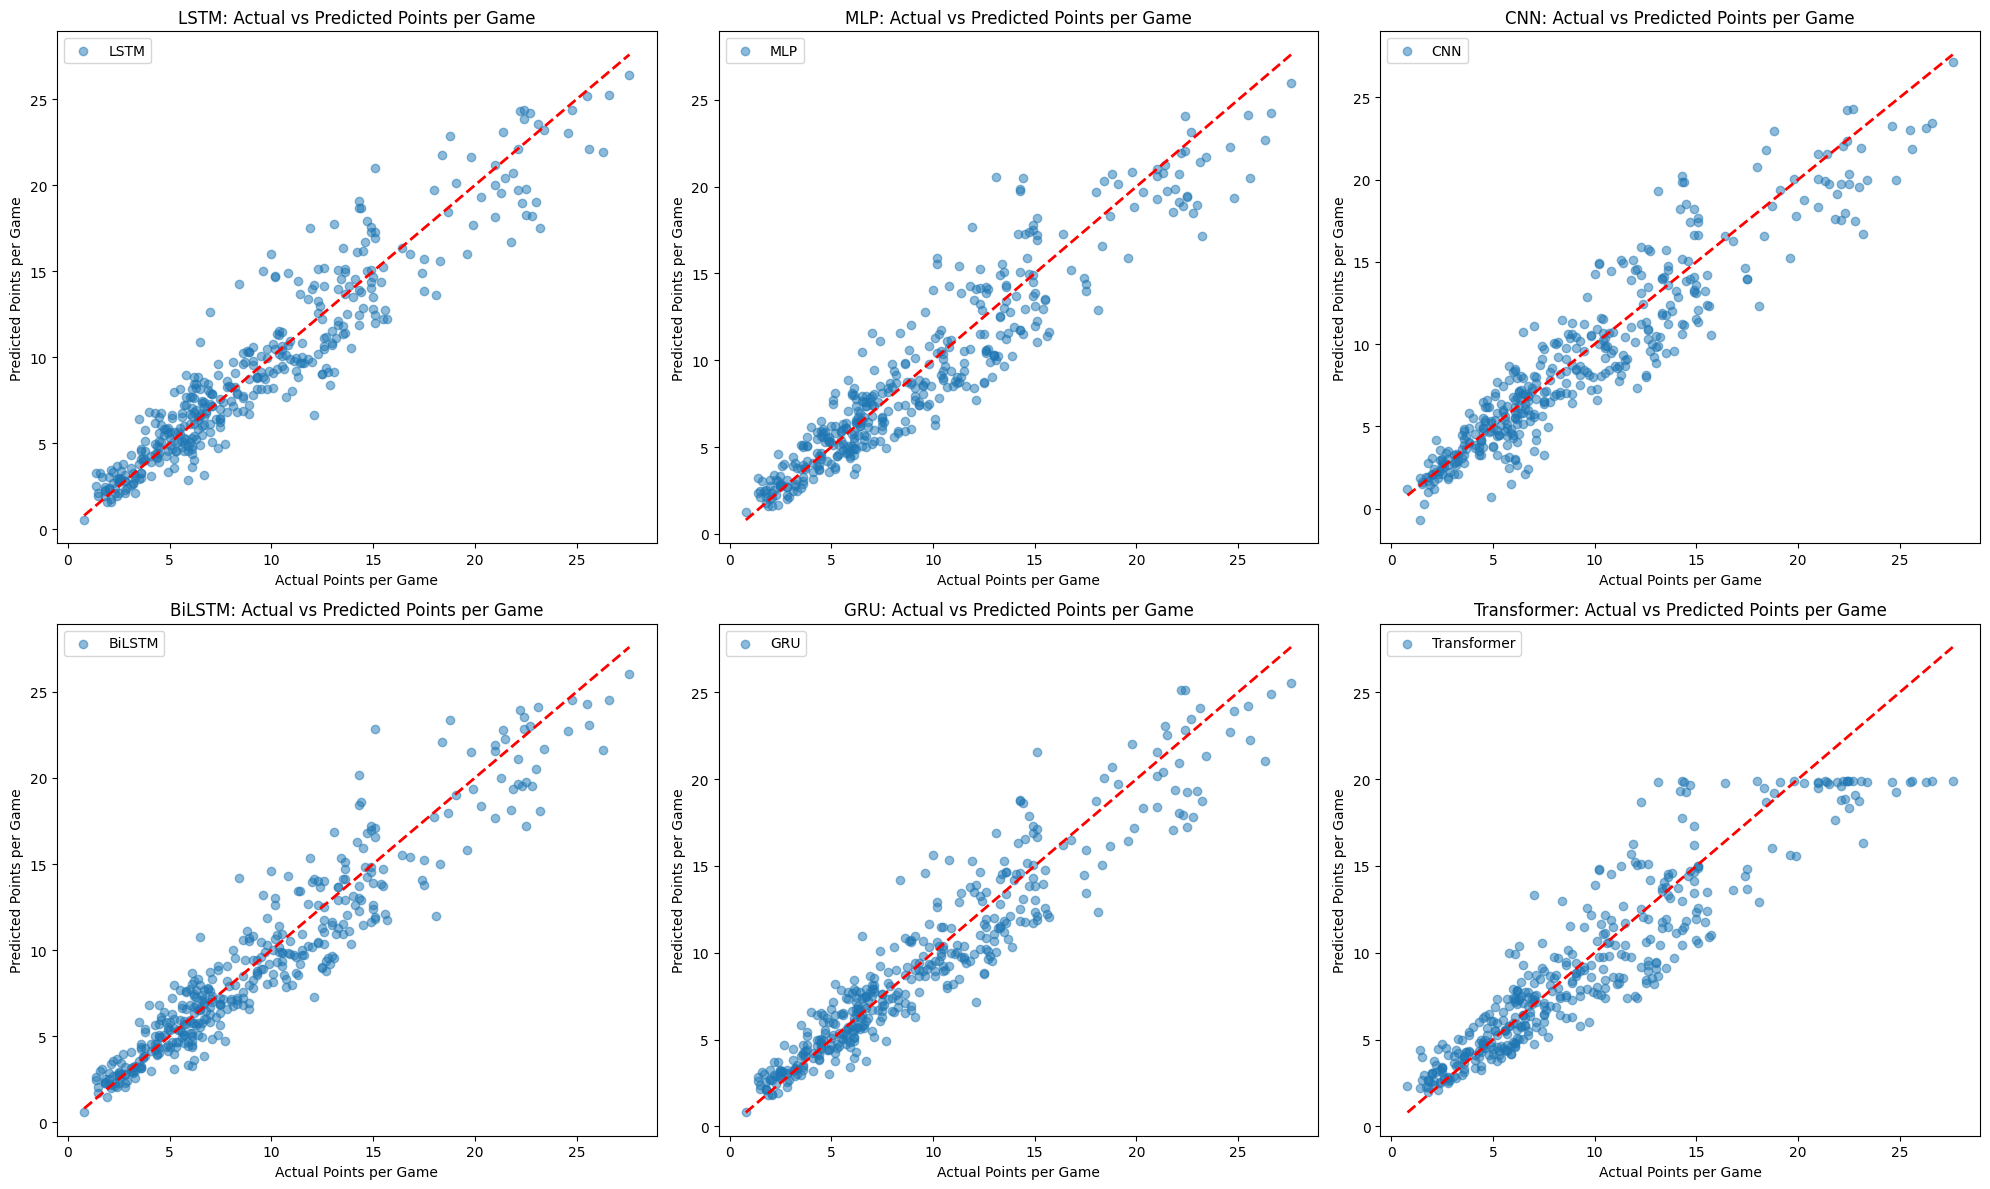

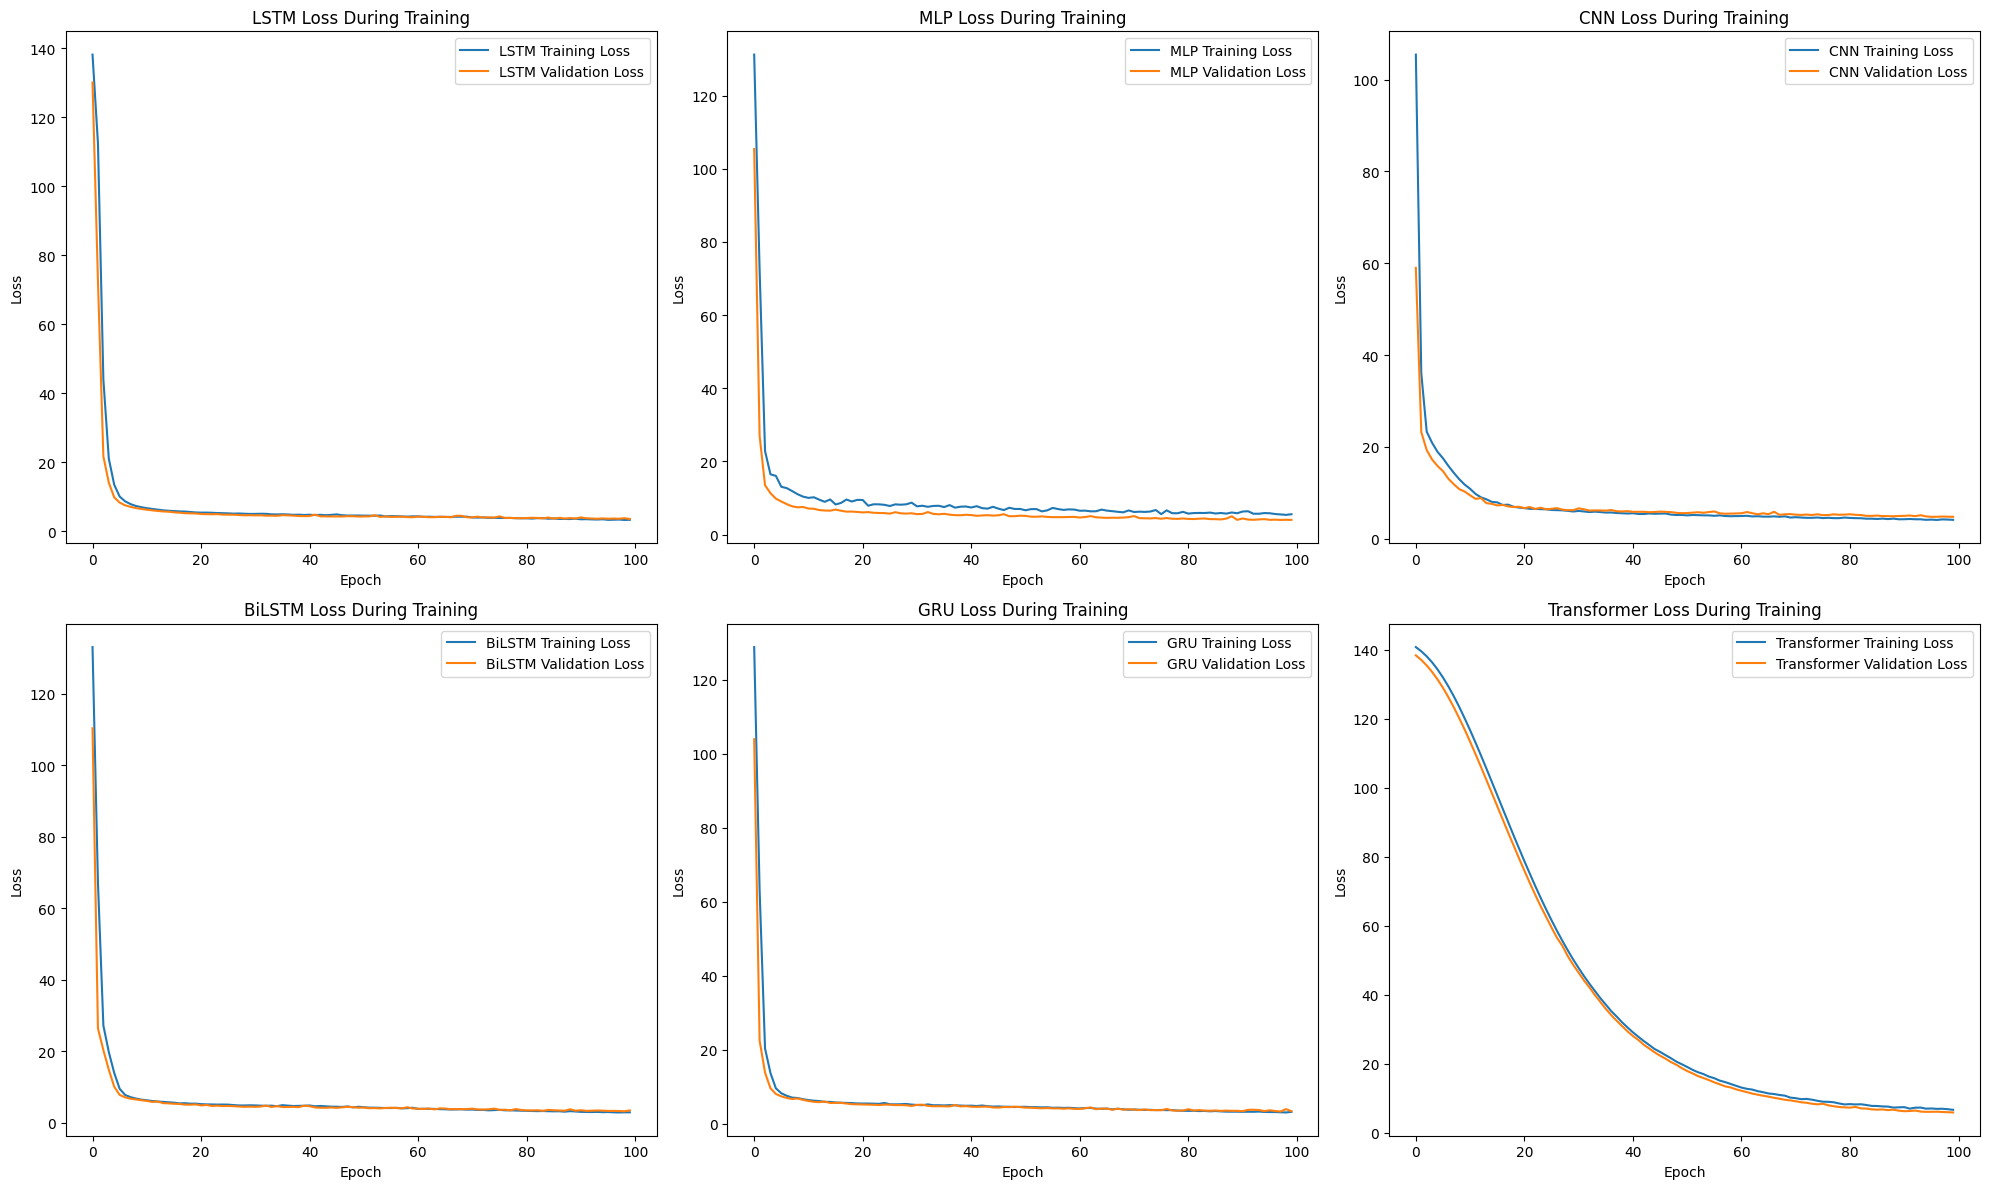

In [ ]:
import matplotlib.pyplot as plt

# Visualize predictions

plt.figure(figsize=(20, 12))
models = ['LSTM', 'MLP', 'CNN', 'BiLSTM', 'GRU', 'Transformer']
predictions = [lstm_predictions, mlp_predictions, cnn_predictions,
               bilstm_predictions, gru_predictions, transformer_predictions]

for i, (model, pred) in enumerate(zip(models, predictions)):
    plt.subplot(2, 3, i+1)
    plt.scatter(y_test, pred, alpha=0.5, label=model)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Points per Game')
    plt.ylabel('Predicted Points per Game')
    plt.title(f'{model}: Actual vs Predicted Points per Game')
    plt.legend()

plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(20, 12))
histories = [lstm_history, mlp_history, cnn_history,
             bilstm_history, gru_history, transformer_history]

for i, (model, history) in enumerate(zip(models, histories)):
    plt.subplot(2, 3, i+1)
    plt.plot(history.history['loss'], label=f'{model} Training Loss')
    plt.plot(history.history['val_loss'], label=f'{model} Validation Loss')
    plt.title(f'{model} Loss During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()

# Generate Predictions for all models

In [ ]:
lstm_predictions = lstm_model.predict(X_test_lstm).flatten()
mlp_predictions = mlp_model.predict(X_test_scaled).flatten()
cnn_predictions = cnn_model.predict(X_test_cnn).flatten()
bilstm_predictions = bilstm_model.predict(X_test_lstm).flatten()
gru_predictions = gru_model.predict(X_test_lstm).flatten()
transformer_predictions = transformer_model.predict(X_test_lstm).flatten()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


# Evaluate all models:

In [ ]:
models = [lstm_model, mlp_model, cnn_model, bilstm_model, gru_model, transformer_model]
model_names = ['LSTM', 'MLP', 'CNN', 'BiLSTM', 'GRU', 'Transformer']
test_data = [X_test_lstm, X_test_scaled, X_test_cnn, X_test_lstm, X_test_lstm, X_test_lstm]

for model, name, data in zip(models, model_names, test_data):
    mae = model.evaluate(data, y_test)[1]
    print(f"{name} MAE: {mae:.2f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.4299 - mae: 1.3914 
LSTM MAE: 1.40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6650 - mae: 1.4555 
MLP MAE: 1.50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2229 - mae: 1.5697 
CNN MAE: 1.60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9950 - mae: 1.3213 
BiLSTM MAE: 1.36
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1919 - mae: 1.3576
GRU MAE: 1.38
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.7841 - mae: 1.6216
Transformer MAE: 1.68


# Visualize predictions:

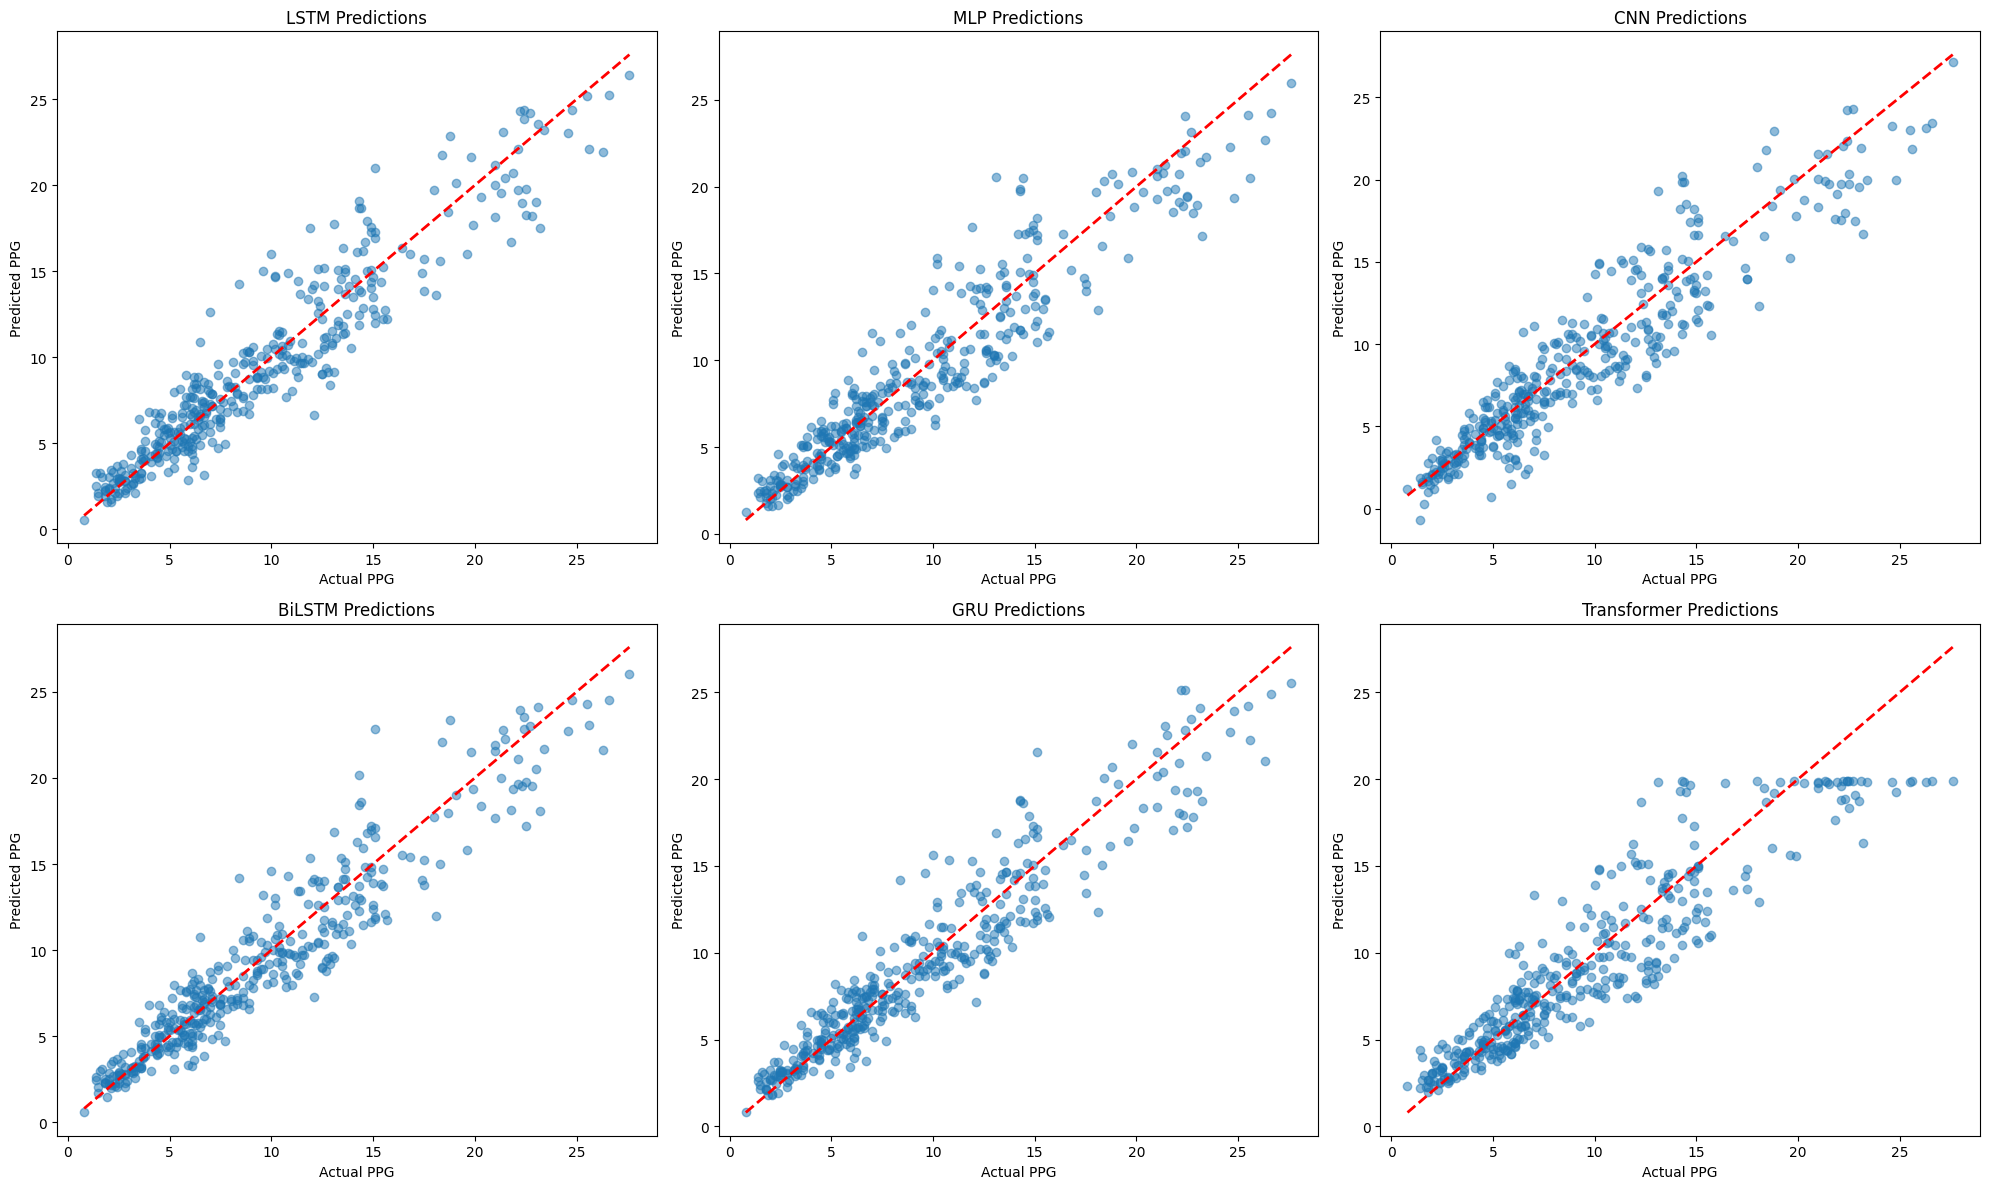

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
predictions = [lstm_predictions, mlp_predictions, cnn_predictions, bilstm_predictions, gru_predictions, transformer_predictions]

for i, (name, pred) in enumerate(zip(model_names, predictions)):
    plt.subplot(2, 3, i+1)
    plt.scatter(y_test, pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual PPG')
    plt.ylabel('Predicted PPG')
    plt.title(f'{name} Predictions')

plt.tight_layout()
plt.show()

# Compare model performance:

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

results = []
for name, pred in zip(model_names, predictions):
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)
    results.append([name, mse, rmse, r2])

results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'RMSE', 'R2'])
print(results_df)

         Model       MSE      RMSE        R2
0         LSTM  3.527810  1.878247  0.892709
1          MLP  3.845483  1.960990  0.883048
2          CNN  4.386096  2.094301  0.866607
3       BiLSTM  3.278220  1.810586  0.900300
4          GRU  3.320824  1.822313  0.899004
5  Transformer  5.137527  2.266611  0.843753


# Analyze feature importance (for MLP model):

The purpose of analyzing feature importance for MLP models is to understand which input variables have the most significant impact on the model's predictions.

708/708 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   1%|          | 2/398 [00:00<?, ?it/s]

706/706 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   1%|          | 4/398 [00:13<04:47,  1.37it/s]

744/744 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   1%|▏         | 5/398 [00:14<06:52,  1.05s/it]

774/774 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   2%|▏         | 6/398 [00:16<08:09,  1.25s/it]

736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:   2%|▏         | 7/398 [00:18<08:45,  1.34s/it]

743/743 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   2%|▏         | 8/398 [00:19<09:06,  1.40s/it]

753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:   2%|▏         | 9/398 [00:22<12:06,  1.87s/it]

748/748 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ExactExplainer explainer:   3%|▎         | 10/398 [00:28<20:05,  3.11s/it]

755/755 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


ExactExplainer explainer:   3%|▎         | 11/398 [00:34<25:47,  4.00s/it]

759/759 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


ExactExplainer explainer:   3%|▎         | 12/398 [00:40<29:30,  4.59s/it]

761/761 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:   3%|▎         | 13/398 [00:43<26:03,  4.06s/it]

716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   4%|▎         | 14/398 [00:45<23:32,  3.68s/it]

761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   4%|▍         | 15/398 [00:47<19:17,  3.02s/it]

749/749 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   4%|▍         | 16/398 [00:48<16:25,  2.58s/it]

746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   4%|▍         | 17/398 [00:50<14:26,  2.28s/it]

719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


ExactExplainer explainer:   5%|▍         | 18/398 [00:53<16:06,  2.54s/it]

768/768 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


ExactExplainer explainer:   5%|▍         | 19/398 [00:58<20:27,  3.24s/it]

743/743 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ExactExplainer explainer:   5%|▌         | 20/398 [01:02<21:39,  3.44s/it]

730/730 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


ExactExplainer explainer:   5%|▌         | 21/398 [01:08<27:14,  4.34s/it]

753/753 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:   6%|▌         | 22/398 [01:13<27:38,  4.41s/it]

722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   6%|▌         | 23/398 [01:14<22:04,  3.53s/it]

740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   6%|▌         | 24/398 [01:17<20:34,  3.30s/it]

712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   6%|▋         | 25/398 [01:19<17:08,  2.76s/it]

755/755 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:   7%|▋         | 26/398 [01:21<17:17,  2.79s/it]

741/741 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   7%|▋         | 27/398 [01:24<17:16,  2.79s/it]

707/707 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   7%|▋         | 28/398 [01:26<14:42,  2.39s/it]

764/764 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   7%|▋         | 29/398 [01:28<15:20,  2.49s/it]

738/738 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   8%|▊         | 30/398 [01:30<13:25,  2.19s/it]

743/743 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   8%|▊         | 31/398 [01:31<12:00,  1.96s/it]

746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ExactExplainer explainer:   8%|▊         | 32/398 [01:34<13:39,  2.24s/it]

757/757 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   8%|▊         | 33/398 [01:37<14:41,  2.42s/it]

770/770 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   9%|▊         | 34/398 [01:39<13:03,  2.15s/it]

752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   9%|▉         | 35/398 [01:40<11:55,  1.97s/it]

739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   9%|▉         | 36/398 [01:43<13:19,  2.21s/it]

744/744 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   9%|▉         | 37/398 [01:44<11:56,  1.98s/it]

711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  10%|▉         | 38/398 [01:46<11:02,  1.84s/it]

766/766 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  10%|▉         | 39/398 [01:49<12:55,  2.16s/it]

740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  10%|█         | 40/398 [01:50<11:53,  1.99s/it]

755/755 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  10%|█         | 41/398 [01:52<10:56,  1.84s/it]

762/762 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  11%|█         | 42/398 [01:55<12:32,  2.11s/it]

715/715 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  11%|█         | 43/398 [01:56<11:25,  1.93s/it]

711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  11%|█         | 44/398 [01:58<10:35,  1.79s/it]

753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  11%|█▏        | 45/398 [01:59<10:10,  1.73s/it]

736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  12%|█▏        | 46/398 [02:01<10:58,  1.87s/it]

720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  12%|█▏        | 47/398 [02:04<11:30,  1.97s/it]

738/738 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  12%|█▏        | 48/398 [02:05<10:35,  1.81s/it]

716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  12%|█▏        | 49/398 [02:07<09:58,  1.72s/it]

756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  13%|█▎        | 50/398 [02:08<09:53,  1.71s/it]

729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  13%|█▎        | 51/398 [02:10<09:37,  1.66s/it]

715/715 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  13%|█▎        | 52/398 [02:11<09:18,  1.61s/it]

747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  13%|█▎        | 53/398 [02:13<09:12,  1.60s/it]

752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  14%|█▎        | 54/398 [02:16<11:22,  1.98s/it]

710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  14%|█▍        | 55/398 [02:19<12:56,  2.26s/it]

702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  14%|█▍        | 56/398 [02:20<11:40,  2.05s/it]

718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  14%|█▍        | 57/398 [02:22<10:42,  1.89s/it]

724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  15%|█▍        | 58/398 [02:23<10:01,  1.77s/it]

704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  15%|█▍        | 59/398 [02:25<09:31,  1.69s/it]

742/742 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  15%|█▌        | 60/398 [02:26<09:12,  1.64s/it]

723/723 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  15%|█▌        | 61/398 [02:29<11:17,  2.01s/it]

744/744 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  16%|█▌        | 62/398 [02:32<12:33,  2.24s/it]

736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  16%|█▌        | 63/398 [02:33<11:12,  2.01s/it]

711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  16%|█▌        | 64/398 [02:35<10:21,  1.86s/it]

744/744 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  16%|█▋        | 65/398 [02:36<09:40,  1.74s/it]

740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  17%|█▋        | 66/398 [02:38<09:12,  1.67s/it]

744/744 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  17%|█▋        | 67/398 [02:39<08:53,  1.61s/it]

766/766 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  17%|█▋        | 68/398 [02:42<10:56,  1.99s/it]

745/745 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  17%|█▋        | 69/398 [02:45<12:13,  2.23s/it]

751/751 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  18%|█▊        | 70/398 [02:47<11:05,  2.03s/it]

730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  18%|█▊        | 71/398 [02:48<10:09,  1.87s/it]

740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  18%|█▊        | 72/398 [02:49<09:29,  1.75s/it]

756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  18%|█▊        | 73/398 [02:51<09:04,  1.68s/it]

761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  19%|█▊        | 74/398 [02:52<08:43,  1.61s/it]

737/737 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  19%|█▉        | 75/398 [02:54<08:43,  1.62s/it]

706/706 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  19%|█▉        | 76/398 [02:56<09:28,  1.77s/it]

758/758 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  19%|█▉        | 77/398 [02:58<10:09,  1.90s/it]

742/742 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  20%|█▉        | 78/398 [03:00<09:26,  1.77s/it]

735/735 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  20%|█▉        | 79/398 [03:01<08:57,  1.69s/it]

736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  20%|██        | 80/398 [03:03<08:38,  1.63s/it]

736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  20%|██        | 81/398 [03:04<08:17,  1.57s/it]

725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  21%|██        | 82/398 [03:06<08:14,  1.56s/it]

761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  21%|██        | 83/398 [03:09<10:15,  1.95s/it]

724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  21%|██        | 84/398 [03:12<11:31,  2.20s/it]

711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  21%|██▏       | 85/398 [03:13<10:19,  1.98s/it]

749/749 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  22%|██▏       | 86/398 [03:14<09:30,  1.83s/it]

741/741 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  22%|██▏       | 87/398 [03:16<08:54,  1.72s/it]

748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  22%|██▏       | 88/398 [03:17<08:30,  1.65s/it]

762/762 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  22%|██▏       | 89/398 [03:19<08:15,  1.60s/it]

719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  23%|██▎       | 90/398 [03:20<07:56,  1.55s/it]

739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  23%|██▎       | 91/398 [03:23<09:51,  1.93s/it]

740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  23%|██▎       | 92/398 [03:26<11:07,  2.18s/it]

735/735 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  23%|██▎       | 93/398 [03:27<09:56,  1.95s/it]

766/766 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  24%|██▎       | 94/398 [03:29<09:13,  1.82s/it]

764/764 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  24%|██▍       | 95/398 [03:30<08:42,  1.72s/it]

736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  24%|██▍       | 96/398 [03:32<08:17,  1.65s/it]

742/742 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  24%|██▍       | 97/398 [03:33<08:01,  1.60s/it]

741/741 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  25%|██▍       | 98/398 [03:35<07:46,  1.56s/it]

733/733 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  25%|██▍       | 99/398 [03:38<09:44,  1.95s/it]

728/728 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  25%|██▌       | 100/398 [03:40<11:04,  2.23s/it]

754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  25%|██▌       | 101/398 [03:43<11:49,  2.39s/it]

738/738 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  26%|██▌       | 102/398 [03:45<10:26,  2.12s/it]

702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  26%|██▌       | 103/398 [03:46<09:27,  1.92s/it]

753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  26%|██▌       | 104/398 [03:48<08:47,  1.80s/it]

729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  26%|██▋       | 105/398 [03:50<10:14,  2.10s/it]

725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  27%|██▋       | 106/398 [03:52<09:41,  1.99s/it]

721/721 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  27%|██▋       | 107/398 [03:54<09:02,  1.86s/it]

714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  27%|██▋       | 108/398 [03:55<08:25,  1.74s/it]

721/721 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  27%|██▋       | 109/398 [03:57<08:00,  1.66s/it]

740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  28%|██▊       | 110/398 [03:58<07:43,  1.61s/it]

739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  28%|██▊       | 111/398 [04:00<07:33,  1.58s/it]

721/721 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  28%|██▊       | 112/398 [04:01<07:23,  1.55s/it]

772/772 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


ExactExplainer explainer:  28%|██▊       | 113/398 [04:04<09:46,  2.06s/it]

742/742 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  29%|██▊       | 114/398 [04:07<10:40,  2.26s/it]

740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  29%|██▉       | 115/398 [04:10<11:20,  2.41s/it]

767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  29%|██▉       | 116/398 [04:12<10:08,  2.16s/it]

740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  29%|██▉       | 117/398 [04:13<09:10,  1.96s/it]

774/774 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  30%|██▉       | 118/398 [04:15<08:39,  1.85s/it]

755/755 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  30%|██▉       | 119/398 [04:17<09:56,  2.14s/it]

751/751 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  30%|███       | 120/398 [04:20<10:50,  2.34s/it]

737/737 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  30%|███       | 121/398 [04:22<09:35,  2.08s/it]

755/755 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  31%|███       | 122/398 [04:24<10:29,  2.28s/it]

721/721 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  31%|███       | 123/398 [04:26<09:18,  2.03s/it]

762/762 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  31%|███       | 124/398 [04:27<08:37,  1.89s/it]

735/735 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  31%|███▏      | 125/398 [04:29<08:02,  1.77s/it]

781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  32%|███▏      | 126/398 [04:32<09:26,  2.08s/it]

706/706 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  32%|███▏      | 127/398 [04:34<09:07,  2.02s/it]

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  32%|███▏      | 128/398 [04:36<10:06,  2.25s/it]

710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  32%|███▏      | 129/398 [04:38<08:57,  2.00s/it]

754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  33%|███▎      | 130/398 [04:39<08:14,  1.85s/it]

743/743 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  33%|███▎      | 131/398 [04:41<07:44,  1.74s/it]

738/738 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  33%|███▎      | 132/398 [04:42<07:22,  1.66s/it]

726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  33%|███▎      | 133/398 [04:45<08:56,  2.02s/it]

740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  34%|███▎      | 134/398 [04:47<08:48,  2.00s/it]

724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  34%|███▍      | 135/398 [04:49<08:06,  1.85s/it]

740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  34%|███▍      | 136/398 [04:50<07:36,  1.74s/it]

730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  34%|███▍      | 137/398 [04:52<07:14,  1.66s/it]

720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  35%|███▍      | 138/398 [04:53<06:58,  1.61s/it]

763/763 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  35%|███▍      | 139/398 [04:55<06:54,  1.60s/it]

753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  35%|███▌      | 140/398 [04:56<06:44,  1.57s/it]

749/749 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  35%|███▌      | 141/398 [04:58<07:02,  1.65s/it]

704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  36%|███▌      | 142/398 [05:00<07:39,  1.79s/it]

749/749 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  36%|███▌      | 143/398 [05:03<08:51,  2.09s/it]

756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  36%|███▌      | 144/398 [05:04<07:59,  1.89s/it]

748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  36%|███▋      | 145/398 [05:06<07:32,  1.79s/it]

742/742 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  37%|███▋      | 146/398 [05:07<07:07,  1.69s/it]

720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  37%|███▋      | 147/398 [05:09<06:49,  1.63s/it]

725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  37%|███▋      | 148/398 [05:10<06:37,  1.59s/it]

778/778 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  37%|███▋      | 149/398 [05:13<08:11,  1.98s/it]

712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  38%|███▊      | 150/398 [05:15<08:12,  1.98s/it]

705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  38%|███▊      | 151/398 [05:17<07:33,  1.84s/it]

708/708 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  38%|███▊      | 152/398 [05:18<07:04,  1.73s/it]

701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  38%|███▊      | 153/398 [05:20<06:51,  1.68s/it]

729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  39%|███▊      | 154/398 [05:21<06:33,  1.61s/it]

764/764 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  39%|███▉      | 155/398 [05:23<06:22,  1.58s/it]

710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  39%|███▉      | 156/398 [05:24<06:13,  1.54s/it]

714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  39%|███▉      | 157/398 [05:27<07:49,  1.95s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  40%|███▉      | 158/398 [05:29<07:49,  1.96s/it]

703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  40%|███▉      | 159/398 [05:30<07:14,  1.82s/it]

723/723 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  40%|████      | 160/398 [05:32<06:46,  1.71s/it]

751/751 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  40%|████      | 161/398 [05:33<06:28,  1.64s/it]

744/744 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  41%|████      | 162/398 [05:36<07:45,  1.97s/it]

747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  41%|████      | 163/398 [05:38<07:09,  1.83s/it]

742/742 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  41%|████      | 164/398 [05:41<08:23,  2.15s/it]

756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  41%|████▏     | 165/398 [05:42<07:54,  2.04s/it]

754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  42%|████▏     | 166/398 [05:44<07:15,  1.88s/it]

736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  42%|████▏     | 167/398 [05:45<06:46,  1.76s/it]

699/699 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  42%|████▏     | 168/398 [05:47<06:26,  1.68s/it]

760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  42%|████▏     | 169/398 [05:48<06:20,  1.66s/it]

737/737 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  43%|████▎     | 170/398 [05:50<06:06,  1.61s/it]

747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  43%|████▎     | 171/398 [05:52<06:05,  1.61s/it]

727/727 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  43%|████▎     | 172/398 [05:54<07:33,  2.00s/it]

747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  43%|████▎     | 173/398 [05:56<06:57,  1.86s/it]

761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  44%|████▎     | 174/398 [05:59<07:56,  2.13s/it]

725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  44%|████▍     | 175/398 [06:00<07:10,  1.93s/it]

725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  44%|████▍     | 176/398 [06:02<06:40,  1.80s/it]

763/763 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  44%|████▍     | 177/398 [06:03<06:18,  1.71s/it]

707/707 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  45%|████▍     | 178/398 [06:05<06:07,  1.67s/it]

715/715 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  45%|████▍     | 179/398 [06:08<07:19,  2.01s/it]

747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  45%|████▌     | 180/398 [06:10<08:06,  2.23s/it]

747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  45%|████▌     | 181/398 [06:13<08:38,  2.39s/it]

716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  46%|████▌     | 182/398 [06:15<07:35,  2.11s/it]

706/706 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  46%|████▌     | 183/398 [06:16<06:53,  1.92s/it]

759/759 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ExactExplainer explainer:  46%|████▌     | 184/398 [06:18<06:32,  1.83s/it]

708/708 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ExactExplainer explainer:  46%|████▋     | 185/398 [06:20<07:35,  2.14s/it]

714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  47%|████▋     | 186/398 [06:22<06:52,  1.95s/it]

753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  47%|████▋     | 187/398 [06:24<06:23,  1.82s/it]

748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  47%|████▋     | 188/398 [06:25<06:00,  1.72s/it]

778/778 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  47%|████▋     | 189/398 [06:27<05:51,  1.68s/it]

763/763 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  48%|████▊     | 190/398 [06:28<05:39,  1.63s/it]

743/743 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  48%|████▊     | 191/398 [06:30<05:31,  1.60s/it]

753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  48%|████▊     | 192/398 [06:33<06:48,  1.99s/it]

723/723 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  48%|████▊     | 193/398 [06:35<06:55,  2.03s/it]

723/723 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  49%|████▊     | 194/398 [06:36<06:20,  1.86s/it]

747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  49%|████▉     | 195/398 [06:38<05:55,  1.75s/it]

709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  49%|████▉     | 196/398 [06:39<05:41,  1.69s/it]

744/744 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  49%|████▉     | 197/398 [06:42<06:48,  2.03s/it]

752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  50%|████▉     | 198/398 [06:43<06:13,  1.87s/it]

741/741 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  50%|█████     | 199/398 [06:46<07:13,  2.18s/it]

723/723 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  50%|█████     | 200/398 [06:49<07:48,  2.37s/it]

746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  51%|█████     | 201/398 [06:52<08:08,  2.48s/it]

719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  51%|█████     | 202/398 [06:53<07:04,  2.17s/it]

785/785 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  51%|█████     | 203/398 [06:56<07:37,  2.35s/it]

745/745 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  51%|█████▏    | 204/398 [06:58<06:49,  2.11s/it]

739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ExactExplainer explainer:  52%|█████▏    | 205/398 [07:01<07:29,  2.33s/it]

746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  52%|█████▏    | 206/398 [07:02<07:06,  2.22s/it]

755/755 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  52%|█████▏    | 207/398 [07:04<06:22,  2.00s/it]

706/706 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  52%|█████▏    | 208/398 [07:05<05:50,  1.84s/it]

710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  53%|█████▎    | 209/398 [07:07<05:28,  1.74s/it]

745/745 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  53%|█████▎    | 210/398 [07:08<05:15,  1.68s/it]

738/738 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  53%|█████▎    | 211/398 [07:10<05:05,  1.63s/it]

749/749 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  53%|█████▎    | 212/398 [07:12<04:57,  1.60s/it]

752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  54%|█████▎    | 213/398 [07:13<05:14,  1.70s/it]

711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  54%|█████▍    | 214/398 [07:16<06:12,  2.02s/it]

729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  54%|█████▍    | 215/398 [07:19<06:50,  2.24s/it]

728/728 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  54%|█████▍    | 216/398 [07:20<06:06,  2.01s/it]

716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  55%|█████▍    | 217/398 [07:22<05:37,  1.86s/it]

730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  55%|█████▍    | 218/398 [07:24<05:16,  1.76s/it]

765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  55%|█████▌    | 219/398 [07:25<05:09,  1.73s/it]

762/762 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  55%|█████▌    | 220/398 [07:27<05:20,  1.80s/it]

732/732 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  56%|█████▌    | 221/398 [07:30<06:11,  2.10s/it]

740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  56%|█████▌    | 222/398 [07:31<05:40,  1.93s/it]

753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  56%|█████▌    | 223/398 [07:34<06:26,  2.21s/it]

779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  56%|█████▋    | 224/398 [07:36<05:54,  2.04s/it]

736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  57%|█████▋    | 225/398 [07:37<05:25,  1.88s/it]

763/763 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  57%|█████▋    | 226/398 [07:39<05:08,  1.80s/it]

753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  57%|█████▋    | 227/398 [07:41<05:16,  1.85s/it]

745/745 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  57%|█████▋    | 228/398 [07:43<05:37,  1.98s/it]

741/741 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  58%|█████▊    | 229/398 [07:46<06:16,  2.23s/it]

746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  58%|█████▊    | 230/398 [07:48<05:44,  2.05s/it]

727/727 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  58%|█████▊    | 231/398 [07:51<06:18,  2.26s/it]

740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  58%|█████▊    | 232/398 [07:52<05:39,  2.04s/it]

751/751 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  59%|█████▊    | 233/398 [07:54<05:13,  1.90s/it]

771/771 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ExactExplainer explainer:  59%|█████▉    | 234/398 [07:57<05:58,  2.19s/it]

728/728 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  59%|█████▉    | 235/398 [07:59<06:26,  2.37s/it]

775/775 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  59%|█████▉    | 236/398 [08:01<05:50,  2.17s/it]

741/741 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  60%|█████▉    | 237/398 [08:02<05:15,  1.96s/it]

771/771 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  60%|█████▉    | 238/398 [08:04<04:52,  1.83s/it]

781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  60%|██████    | 239/398 [08:06<04:42,  1.77s/it]

739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ExactExplainer explainer:  60%|██████    | 240/398 [08:09<05:32,  2.10s/it]

710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  61%|██████    | 241/398 [08:11<06:02,  2.31s/it]

722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  61%|██████    | 242/398 [08:13<05:21,  2.06s/it]

722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  61%|██████    | 243/398 [08:14<04:52,  1.89s/it]

712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  61%|██████▏   | 244/398 [08:16<04:35,  1.79s/it]

754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  62%|██████▏   | 245/398 [08:19<05:17,  2.07s/it]

737/737 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  62%|██████▏   | 246/398 [08:20<04:49,  1.91s/it]

780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  62%|██████▏   | 247/398 [08:23<05:28,  2.18s/it]

752/752 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  62%|██████▏   | 248/398 [08:25<05:22,  2.15s/it]

756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  63%|██████▎   | 249/398 [08:26<04:51,  1.96s/it]

711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  63%|██████▎   | 250/398 [08:28<04:27,  1.80s/it]

726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  63%|██████▎   | 251/398 [08:31<05:07,  2.09s/it]

749/749 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  63%|██████▎   | 252/398 [08:32<04:38,  1.91s/it]

729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  64%|██████▎   | 253/398 [08:34<04:18,  1.78s/it]

742/742 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  64%|██████▍   | 254/398 [08:37<05:03,  2.11s/it]

753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  64%|██████▍   | 255/398 [08:39<05:30,  2.31s/it]

703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  64%|██████▍   | 256/398 [08:41<04:50,  2.05s/it]

741/741 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  65%|██████▍   | 257/398 [08:43<05:18,  2.26s/it]

747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  65%|██████▍   | 258/398 [08:45<04:44,  2.03s/it]

748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  65%|██████▌   | 259/398 [08:46<04:19,  1.87s/it]

753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  65%|██████▌   | 260/398 [08:48<04:05,  1.78s/it]

747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  66%|██████▌   | 261/398 [08:51<04:48,  2.11s/it]

763/763 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  66%|██████▌   | 262/398 [08:54<05:15,  2.32s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  66%|██████▌   | 263/398 [08:55<04:37,  2.05s/it]

709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  66%|██████▋   | 264/398 [08:57<04:13,  1.89s/it]

738/738 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  67%|██████▋   | 265/398 [08:58<03:55,  1.77s/it]

755/755 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  67%|██████▋   | 266/398 [09:00<03:44,  1.70s/it]

751/751 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  67%|██████▋   | 267/398 [09:01<03:34,  1.64s/it]

755/755 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ExactExplainer explainer:  67%|██████▋   | 268/398 [09:04<04:19,  1.99s/it]

755/755 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  68%|██████▊   | 269/398 [09:06<04:17,  2.00s/it]

776/776 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  68%|██████▊   | 270/398 [09:09<04:47,  2.25s/it]

738/738 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  68%|██████▊   | 271/398 [09:10<04:16,  2.02s/it]

776/776 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  68%|██████▊   | 272/398 [09:12<04:01,  1.92s/it]

749/749 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  69%|██████▊   | 273/398 [09:14<03:47,  1.82s/it]

741/741 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  69%|██████▉   | 274/398 [09:16<04:24,  2.13s/it]

717/717 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  69%|██████▉   | 275/398 [09:19<04:27,  2.17s/it]

763/763 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  69%|██████▉   | 276/398 [09:22<04:48,  2.37s/it]

728/728 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  70%|██████▉   | 277/398 [09:23<04:13,  2.09s/it]

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  70%|██████▉   | 278/398 [09:24<03:48,  1.90s/it]

719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  70%|███████   | 279/398 [09:26<03:32,  1.79s/it]

709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  70%|███████   | 280/398 [09:28<03:22,  1.72s/it]

727/727 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  71%|███████   | 281/398 [09:29<03:13,  1.66s/it]

749/749 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  71%|███████   | 282/398 [09:31<03:21,  1.73s/it]

757/757 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  71%|███████   | 283/398 [09:34<03:56,  2.05s/it]

753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  71%|███████▏  | 284/398 [09:35<03:35,  1.89s/it]

737/737 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  72%|███████▏  | 285/398 [09:37<03:21,  1.78s/it]

702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  72%|███████▏  | 286/398 [09:38<03:09,  1.69s/it]

729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  72%|███████▏  | 287/398 [09:41<03:43,  2.02s/it]

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  72%|███████▏  | 288/398 [09:43<03:23,  1.85s/it]

752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  73%|███████▎  | 289/398 [09:45<03:53,  2.14s/it]

727/727 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  73%|███████▎  | 290/398 [09:48<03:55,  2.18s/it]

708/708 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  73%|███████▎  | 291/398 [09:49<03:32,  1.98s/it]

729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  73%|███████▎  | 292/398 [09:52<03:54,  2.21s/it]

754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  74%|███████▎  | 293/398 [09:53<03:30,  2.00s/it]

737/737 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  74%|███████▍  | 294/398 [09:56<03:51,  2.23s/it]

714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  74%|███████▍  | 295/398 [09:58<03:31,  2.06s/it]

706/706 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  74%|███████▍  | 296/398 [10:01<03:52,  2.28s/it]

715/715 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  75%|███████▍  | 297/398 [10:02<03:24,  2.02s/it]

739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  75%|███████▍  | 298/398 [10:04<03:06,  1.86s/it]

755/755 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  75%|███████▌  | 299/398 [10:06<03:30,  2.13s/it]

715/715 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  75%|███████▌  | 300/398 [10:08<03:11,  1.96s/it]

755/755 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  76%|███████▌  | 301/398 [10:09<03:00,  1.86s/it]

739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ExactExplainer explainer:  76%|███████▌  | 302/398 [10:12<03:27,  2.16s/it]

707/707 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  76%|███████▌  | 303/398 [10:15<03:43,  2.35s/it]

753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  76%|███████▋  | 304/398 [10:17<03:19,  2.13s/it]

747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  77%|███████▋  | 305/398 [10:19<03:35,  2.32s/it]

751/751 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  77%|███████▋  | 306/398 [10:21<03:11,  2.08s/it]

754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  77%|███████▋  | 307/398 [10:23<02:56,  1.94s/it]

759/759 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  77%|███████▋  | 308/398 [10:25<03:17,  2.20s/it]

733/733 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  78%|███████▊  | 309/398 [10:28<03:33,  2.40s/it]

775/775 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  78%|███████▊  | 310/398 [10:30<03:10,  2.16s/it]

753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  78%|███████▊  | 311/398 [10:31<02:51,  1.97s/it]

747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  78%|███████▊  | 312/398 [10:33<02:37,  1.84s/it]

728/728 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  79%|███████▊  | 313/398 [10:34<02:26,  1.72s/it]

779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  79%|███████▉  | 314/398 [10:36<02:23,  1.71s/it]

745/745 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  79%|███████▉  | 315/398 [10:38<02:16,  1.65s/it]

729/729 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  79%|███████▉  | 316/398 [10:40<02:44,  2.01s/it]

730/730 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  80%|███████▉  | 317/398 [10:43<03:01,  2.24s/it]

710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  80%|███████▉  | 318/398 [10:46<03:11,  2.39s/it]

743/743 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  80%|████████  | 319/398 [10:47<02:48,  2.13s/it]

756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  80%|████████  | 320/398 [10:49<02:32,  1.96s/it]

737/737 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  81%|████████  | 321/398 [10:51<02:22,  1.85s/it]

704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  81%|████████  | 322/398 [10:52<02:11,  1.73s/it]

758/758 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  81%|████████  | 323/398 [10:54<02:18,  1.85s/it]

707/707 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  81%|████████▏ | 324/398 [10:57<02:37,  2.13s/it]

761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  82%|████████▏ | 325/398 [10:59<02:24,  1.98s/it]

738/738 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  82%|████████▏ | 326/398 [11:00<02:13,  1.85s/it]

717/717 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  82%|████████▏ | 327/398 [11:02<02:03,  1.74s/it]

714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  82%|████████▏ | 328/398 [11:03<01:56,  1.66s/it]

772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  83%|████████▎ | 329/398 [11:05<01:53,  1.65s/it]

745/745 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  83%|████████▎ | 330/398 [11:06<01:48,  1.59s/it]

742/742 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ExactExplainer explainer:  83%|████████▎ | 331/398 [11:09<02:11,  1.97s/it]

721/721 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ExactExplainer explainer:  83%|████████▎ | 332/398 [11:15<03:20,  3.04s/it]

746/746 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  84%|████████▎ | 333/398 [11:20<04:02,  3.73s/it]

753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  84%|████████▍ | 334/398 [11:22<03:23,  3.19s/it]

763/763 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  84%|████████▍ | 335/398 [11:24<03:03,  2.92s/it]

758/758 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  84%|████████▍ | 336/398 [11:27<03:00,  2.91s/it]

766/766 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  85%|████████▍ | 337/398 [11:29<02:32,  2.50s/it]

740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  85%|████████▍ | 338/398 [11:30<02:12,  2.21s/it]

758/758 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  85%|████████▌ | 339/398 [11:33<02:20,  2.37s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  85%|████████▌ | 340/398 [11:34<02:02,  2.11s/it]

758/758 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ExactExplainer explainer:  86%|████████▌ | 341/398 [11:37<02:13,  2.34s/it]

739/739 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  86%|████████▌ | 342/398 [11:39<02:05,  2.25s/it]

732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  86%|████████▌ | 343/398 [11:41<01:51,  2.04s/it]

715/715 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  86%|████████▋ | 344/398 [11:42<01:41,  1.88s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  87%|████████▋ | 345/398 [11:44<01:33,  1.76s/it]

748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  87%|████████▋ | 346/398 [11:45<01:28,  1.70s/it]

720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  87%|████████▋ | 347/398 [11:47<01:23,  1.64s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  87%|████████▋ | 348/398 [11:50<01:39,  1.98s/it]

745/745 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  88%|████████▊ | 349/398 [11:52<01:42,  2.09s/it]

727/727 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  88%|████████▊ | 350/398 [11:54<01:35,  1.98s/it]

776/776 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  88%|████████▊ | 351/398 [11:55<01:27,  1.86s/it]

722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  88%|████████▊ | 352/398 [11:57<01:21,  1.78s/it]

726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  89%|████████▊ | 353/398 [11:58<01:17,  1.71s/it]

712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  89%|████████▉ | 354/398 [12:00<01:13,  1.66s/it]

725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  89%|████████▉ | 355/398 [12:02<01:09,  1.61s/it]

751/751 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ExactExplainer explainer:  89%|████████▉ | 356/398 [12:03<01:10,  1.69s/it]

711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  90%|████████▉ | 357/398 [12:06<01:16,  1.86s/it]

747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  90%|████████▉ | 358/398 [12:08<01:25,  2.14s/it]

725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  90%|█████████ | 359/398 [12:11<01:31,  2.35s/it]

718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  90%|█████████ | 360/398 [12:13<01:19,  2.10s/it]

737/737 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  91%|█████████ | 361/398 [12:16<01:25,  2.30s/it]

702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  91%|█████████ | 362/398 [12:17<01:14,  2.08s/it]

704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  91%|█████████ | 363/398 [12:20<01:20,  2.31s/it]

705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  91%|█████████▏| 364/398 [12:22<01:12,  2.13s/it]

717/717 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  92%|█████████▏| 365/398 [12:23<01:04,  1.94s/it]

749/749 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  92%|█████████▏| 366/398 [12:25<00:58,  1.82s/it]

735/735 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  92%|█████████▏| 367/398 [12:26<00:53,  1.72s/it]

754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  92%|█████████▏| 368/398 [12:29<01:01,  2.03s/it]

737/737 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  93%|█████████▎| 369/398 [12:31<00:55,  1.91s/it]

746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  93%|█████████▎| 370/398 [12:34<01:02,  2.22s/it]

734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  93%|█████████▎| 371/398 [12:35<00:55,  2.06s/it]

752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  93%|█████████▎| 372/398 [12:38<00:59,  2.30s/it]

755/755 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  94%|█████████▎| 373/398 [12:40<00:52,  2.11s/it]

719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  94%|█████████▍| 374/398 [12:41<00:47,  1.96s/it]

708/708 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ExactExplainer explainer:  94%|█████████▍| 375/398 [12:44<00:51,  2.23s/it]

721/721 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  94%|█████████▍| 376/398 [12:47<00:50,  2.28s/it]

755/755 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  95%|█████████▍| 377/398 [12:49<00:51,  2.43s/it]

732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  95%|█████████▍| 378/398 [12:51<00:43,  2.16s/it]

722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  95%|█████████▌| 379/398 [12:52<00:37,  1.98s/it]

721/721 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  95%|█████████▌| 380/398 [12:54<00:32,  1.83s/it]

736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  96%|█████████▌| 381/398 [12:55<00:29,  1.73s/it]

739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  96%|█████████▌| 382/398 [12:57<00:26,  1.67s/it]

736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  96%|█████████▌| 383/398 [12:58<00:24,  1.61s/it]

746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  96%|█████████▋| 384/398 [13:01<00:27,  1.99s/it]

745/745 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  97%|█████████▋| 385/398 [13:03<00:25,  1.93s/it]

714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  97%|█████████▋| 386/398 [13:05<00:21,  1.80s/it]

754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  97%|█████████▋| 387/398 [13:07<00:22,  2.09s/it]

745/745 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  97%|█████████▋| 388/398 [13:10<00:22,  2.29s/it]

751/751 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  98%|█████████▊| 389/398 [13:12<00:18,  2.09s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  98%|█████████▊| 390/398 [13:14<00:17,  2.15s/it]

770/770 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  98%|█████████▊| 391/398 [13:17<00:16,  2.37s/it]

740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  98%|█████████▊| 392/398 [13:19<00:12,  2.15s/it]

753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  99%|█████████▊| 393/398 [13:20<00:10,  2.02s/it]

707/707 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  99%|█████████▉| 394/398 [13:22<00:07,  1.87s/it]

769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  99%|█████████▉| 395/398 [13:25<00:06,  2.14s/it]

765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  99%|█████████▉| 396/398 [13:27<00:04,  2.36s/it]

702/702 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer: 100%|█████████▉| 397/398 [13:30<00:02,  2.33s/it]

719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer: 100%|██████████| 398/398 [13:32<00:00,  2.47s/it]

742/742 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer: 399it [13:34,  2.05s/it]


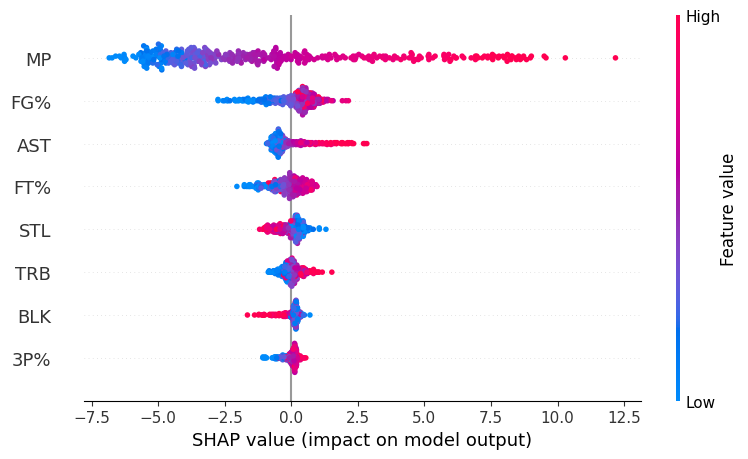

In [ ]:
import shap

explainer = shap.Explainer(mlp_model.predict, X_train_scaled)
shap_values = explainer(X_test_scaled)

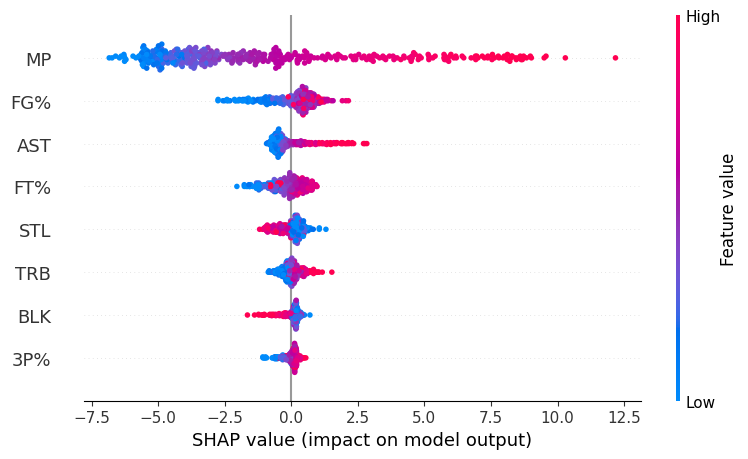

In [ ]:
shap.summary_plot(shap_values, X_test_scaled, feature_names=features)

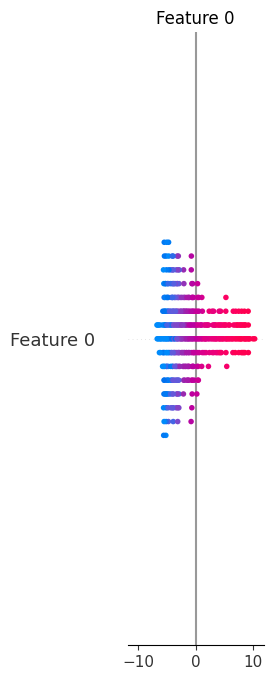

In [ ]:
# Plot the summary of SHAP values
shap.summary_plot(shap_values, X_test_scaled)

# Make predictions for new players:

This code does the following:
1. Defines a predict_ppg function that can handle the input requirements of all 6 models.
2. Selects a random player from the test set.
3. Predicts the PPG for this player using all 6 models.
4. Prints the actual PPG alongside the predictions from each model.

This approach allows us to compare how well each model predicts PPG for a real player in your dataset, rather than using arbitrary example stats. It provides a more realistic assessment of each model's performance on unseen data.

In [ ]:
import numpy as np

def predict_ppg(model, player_stats, scaler):
    scaled_stats = scaler.transform(player_stats.reshape(1, -1))
    if model in [lstm_model, bilstm_model, gru_model, transformer_model]:
        scaled_stats = scaled_stats.reshape((1, 1, scaled_stats.shape[1]))
    elif model == cnn_model:
        scaled_stats = scaled_stats.reshape((1, scaled_stats.shape[1], 1))
    return model.predict(scaled_stats)[0][0]

# Ensure features is a list or numpy array
features = list(features)

# Select a random player from the test set
random_index = np.random.randint(0, len(X_test))
test_player = X_test[random_index]
actual_ppg = y_test[random_index]

# Get player name (assuming you have a DataFrame with player names)
player_name = df_filtered['Player'].iloc[random_index]

models = [lstm_model, mlp_model, cnn_model, bilstm_model, gru_model, transformer_model]
model_names = ['LSTM', 'MLP', 'CNN', 'BiLSTM', 'GRU', 'Transformer']

print(f"Selected player: {player_name}")
print(f"Actual PPG: {actual_ppg:.2f}")

for model, name in zip(models, model_names):
    try:
        ppg_prediction = predict_ppg(model, test_player, scaler)
        print(f"{name} predicts {ppg_prediction:.2f} PPG")
    except Exception as e:
        print(f"Error predicting with {name}: {str(e)}")

Selected player: Dante Exum
Actual PPG: 4.40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
LSTM predicts 4.17 PPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
MLP predicts 3.99 PPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
CNN predicts 4.24 PPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
BiLSTM predicts 4.38 PPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
GRU predicts 4.10 PPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Transformer predicts 3.47 PPG


Based on the final results for predicting Dante Exum's Points Per Game (PPG), we can draw the following closing thoughts:

1. Model Performance: All six deep learning models (LSTM, MLP, CNN, BiLSTM, GRU, and Transformer) performed reasonably well in predicting Dante Exum's PPG. The predictions ranged from 3.47 to 4.38 PPG, compared to the actual 4.40 PPG.
2. Best Performing Model: The Bidirectional LSTM (BiLSTM) model showed the most accurate prediction, with 4.38 PPG, which is remarkably close to the actual value of 4.40 PPG.
3. Consistency: Most models (LSTM, MLP, CNN, BiLSTM, and GRU) provided predictions within a narrow range of 3.99 to 4.38 PPG, suggesting a good level of consistency across different architectures.
4. Outlier: The Transformer model's prediction of 3.47 PPG was the least accurate, underestimating Exum's performance by nearly a full point. This suggests that the Transformer architecture might need further tuning for this specific prediction task.
5. Practical Implications: The ability to predict a player's PPG within such a close range demonstrates the potential of these models for player performance analysis, scouting, and strategic decision-making in professional basketball.
6. Future Improvements: While the predictions are generally good, there's still room for improvement. Fine-tuning hyperparameters, incorporating more relevant features, or exploring ensemble methods could potentially enhance prediction accuracy.
7. Model Selection: For future predictions, the BiLSTM model appears to be the most promising, but it would be advisable to test these models on a larger set of players to confirm their overall effectiveness and consistency.

These results highlight the power of deep learning in sports analytics and showcase the potential for accurate player performance prediction in the NBA.

# Final Goal:

The goal of this project is to predict NBA player performance, specifically Points Per Game (PPG), using six different deep learning models. The models being used are:

1. LSTM (Long Short-Term Memory)
2. MLP (Multi-Layer Perceptron)
3. CNN (Convolutional Neural Network)
4. BiLSTM (Bidirectional LSTM)
5. GRU (Gated Recurrent Unit)
6. Transformer

These models are being trained and evaluated to forecast a player's scoring output.